#Business Case: Delhivery - Feature Engineering

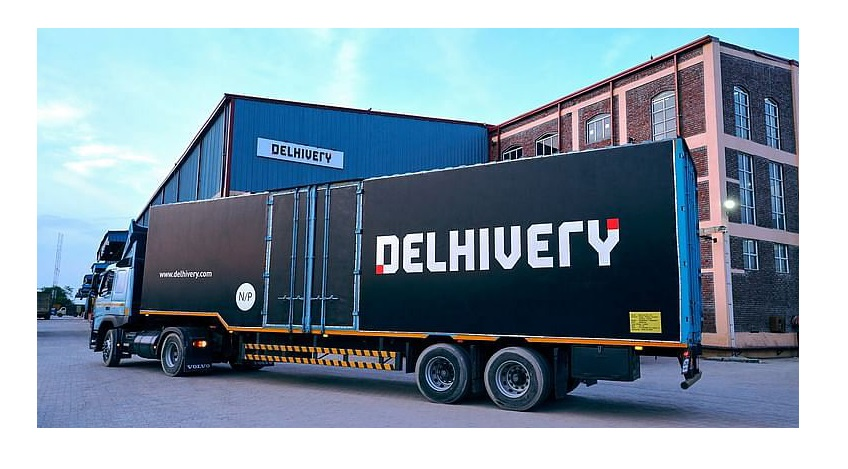

#MindSet:

  1. Evaluation will be kept lenient, so make sure you attempt this case study.
  2. It is understandable that you might struggle with getting started o this.
     Just brainstorm, discuss with peers, or get help from TAs.
  3. There is no right or wrong answer. We have to get used to dealing with
     uncertainty in business.This is exactly the skill we want to develop.

#About DELHIVERY:

● Delhivery, India's leading and rapidly growing integrated player, has set  its sights on creating the commerce operating system.

● Delhivery was established in May 2011 as SSN Logistics Ltd. It was initially conceptualised as a hyperlocal express delivery service provider for offline stores, delivering flowers and food locally in the city of Gurugram for the first few months since its inception.During that time, the online retailing and e-commerce segment was expanding rapidly in India, with global investors showing significant interest in the industry.

##Defining Business Problem Statement and Analyzing basic metrics
Problem Statement:

They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.

##Column Profiling:

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type

   a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

   b. Carting: Handling system consisting of small vehicles (carts)

5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

6. source_center - Source ID of trip origin

7. source_name - Source Name of trip origin

8. destination_cente – Destination ID

9. destination_name – Destination Name


10. od_start_time – Trip start time

11. od_end_time – Trip end time

12. start_scan_to_end_scan – Time taken to deliver from source to destination

13. is_cutoff – Unknown field

14. cutoff_factor – Unknown field

15. cutoff_timestamp – Unknown field

16. actual_distance_to_destination – Distance in kms between source and destination warehouse

17. actual_time – Actual time taken to complete the delivery (Cumulative)

18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

20. factor – Unknown field

21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

24. segment_factor – Unknown field

##What does ‘good’ look like?

###Importing all the libraries for analyzing the case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cl
import statistics as st
import datetime as dt
import scipy.stats as stats
from scipy.stats import (norm,ttest_rel, ttest_ind, f_oneway, chisquare, chi2_contingency)
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

In [2]:
# Read The Data
df = pd.read_csv('delhivery_data.csv')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,training,2018-09-12 20:24:29.188095,thanos::sroute:162f9a67-5ebe-4338-8450-1c6d57d...,FTL,trip-153678386918787011,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-13 03:42:55.423049,...,2018-09-13 21:01:23,749.432895,1153.0,569.0,806.1262,2.026362,39.0,18.0,26.8015,2.166667
5456,training,2018-09-12 20:24:29.188095,thanos::sroute:162f9a67-5ebe-4338-8450-1c6d57d...,FTL,trip-153678386918787011,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-13 03:42:55.423049,...,2018-09-13 20:33:23,770.763779,1181.0,581.0,822.2078,2.032702,28.0,17.0,24.8675,1.647059
5457,training,2018-09-12 20:24:29.188095,thanos::sroute:162f9a67-5ebe-4338-8450-1c6d57d...,FTL,trip-153678386918787011,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-13 03:42:55.423049,...,2018-09-13 20:13:30,792.815754,1201.0,610.0,863.0487,1.968852,19.0,28.0,40.8410,0.678571
5458,training,2018-09-12 20:24:29.188095,thanos::sroute:162f9a67-5ebe-4338-8450-1c6d57d...,FTL,trip-153678386918787011,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-09-13 03:42:55.423049,...,2018-09-13 19:35:21,818.528214,1239.0,624.0,882.1135,1.985577,38.0,47.0,65.9129,0.808511


In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.shape

(5460, 24)

In [6]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            5460 non-null   object 
 1   trip_creation_time              5460 non-null   object 
 2   route_schedule_uuid             5460 non-null   object 
 3   route_type                      5459 non-null   object 
 4   trip_uuid                       5459 non-null   object 
 5   source_center                   5459 non-null   object 
 6   source_name                     5438 non-null   object 
 7   destination_center              5459 non-null   object 
 8   destination_name                5451 non-null   object 
 9   od_start_time                   5459 non-null   object 
 10  od_end_time                     5459 non-null   object 
 11  start_scan_to_end_scan          5459 non-null   float64
 12  is_cutoff                       54

In [9]:
not_required_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df=df.drop(columns = not_required_columns)

In [10]:
df.nunique()

,0
data,2
trip_creation_time,587
route_schedule_uuid,447
route_type,2
trip_uuid,587
source_center,555
source_name,552
destination_center,550
destination_name,547
od_start_time,1062


In [11]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000,5459.000000
mean,880.768273,216.970249,381.978934,201.280821,265.342989,36.222568,18.303719,22.429220
std,992.546724,336.418659,565.798027,305.279616,414.603425,48.766553,11.833789,13.592035
min,25.000000,9.000267,9.000000,6.000000,9.202000,-26.000000,0.000000,0.000000
25%,148.000000,22.948256,49.000000,26.000000,28.757800,20.000000,11.000000,12.007600
50%,379.000000,54.442149,116.000000,58.000000,70.677700,29.000000,17.000000,23.522900
75%,1285.000000,242.572677,439.500000,220.500000,288.167050,41.000000,22.000000,27.685150
max,3230.000000,1690.302865,2873.000000,1549.000000,2095.672900,1136.000000,154.000000,215.255200


In [12]:
df["data"]=df["data"].astype("category")
df["route_type"]=df["route_type"].astype("category")

In [13]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

In [14]:
df["od_start_time"] = pd.to_datetime(df["od_start_time"])

In [15]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            5460 non-null   category      
 1   trip_creation_time              5460 non-null   datetime64[ns]
 2   route_schedule_uuid             5460 non-null   object        
 3   route_type                      5459 non-null   category      
 4   trip_uuid                       5459 non-null   object        
 5   source_center                   5459 non-null   object        
 6   source_name                     5438 non-null   object        
 7   destination_center              5459 non-null   object        
 8   destination_name                5451 non-null   object        
 9   od_start_time                   5459 non-null   datetime64[ns]
 10  od_end_time                     5459 non-null   datetime64[ns]
 11  star

In [17]:
time_period = (df["od_end_time"].max(),df["trip_creation_time"].min())
time_period

(Timestamp('2018-10-05 08:18:50.827953'),
 Timestamp('2018-09-12 00:25:19.499696'))

##Total 26 days of data are given in the dataset

###1. Basic data cleaning and exploration:

In [18]:
np.any(df.isnull())

True

1. Handle missing values in the data.

In [19]:
# Check for missing values
print(df.isnull().sum())

data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         1
trip_uuid                          1
source_center                      1
source_name                       22
destination_center                 1
destination_name                   9
od_start_time                      1
od_end_time                        1
start_scan_to_end_scan             1
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
dtype: int64


2. Converting time columns into pandas datetime

In [26]:
# Print the first few rows of the DataFrame
print(df.head())

# Print the column names
print(df.columns)

# Print the data types of each column
print(df.dtypes)

# Get the actual column names from the DataFrame
actual_columns = df.columns.tolist()

# Print the actual column names
print("Actual column names:", actual_columns)

# Convert time columns into pandas datetime
time_columns = []  # Initialize an empty list to store the actual time column names

# Iterate over the actual column names
for column in actual_columns:
    # Check if the column name contains 'time' or 'date'
    if 'time' in column.lower() or 'date' in column.lower():
        time_columns.append(column)

# Print the actual time column names
print("Actual time column names:", time_columns)

# Convert the actual time columns into pandas datetime
for column in time_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Print the updated data types of each column
print(df.dtypes)

# Print the summary statistics of the DataFrame
print(df.describe())

# Print the number of missing values in each column
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Print the updated number of missing values in each column
print(df.isnull().sum())

       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   
5  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                    source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA    

In [21]:


# Check the column names
print(df.columns)

# Convert the column to datetime
if 'trip_creation_time' in df.columns:
    df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
else:
    print("The column 'trip_creation_time' does not exist in the DataFrame.")

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')


In [ ]:
print(df.columns)


Index(['date_column', 'time_column'], dtype='object')


In [ ]:
if 'trip_creation_time' in df.columns:
    df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
else:
    print("Column 'trip_creation_time' does not exist.")


Column 'trip_creation_time' does not exist.


In [ ]:
# import pandas as pd

# Sample data with potential column name issue
data = {
    'trip_creation_time ': ['2024-08-01 14:25:00', '2024-08-02 15:30:00', '2024-08-03 16:45:00']
}

# Create DataFrame
df = pd.DataFrame(data)

# Print column names to verify
print("Original Columns:", df.columns)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print column names again to verify
print("Stripped Columns:", df.columns)

# Convert 'trip_creation_time' to datetime
if 'trip_creation_time' in df.columns:
    df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
    print(df)
else:
    print("Column 'trip_creation_time' does not exist.")


Original Columns: Index(['trip_creation_time '], dtype='object')
Stripped Columns: Index(['trip_creation_time'], dtype='object')
   trip_creation_time
0 2024-08-01 14:25:00
1 2024-08-02 15:30:00
2 2024-08-03 16:45:00


In [ ]:
print(df.columns)


Index(['date_column', 'time_column'], dtype='object')


In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], errors='coerce')

In [ ]:
df

,trip_creation_time
0,2024-08-01 14:25:00
1,2024-08-02 15:30:00
2,2024-08-03 16:45:00


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trip_creation_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trip_creation_time'}, axis=1)
              .sort_values('trip_creation_time', ascending=True))
  xs = counted['trip_creation_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('trip_creation_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trip_creation_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trip_creation_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trip_creation_time'}, axis=1)
              .sort_values('trip_creation_time', ascending=True))
  xs = counted['trip_creation_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('trip_creation_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trip_creation_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trip_creation_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trip_creation_time'}, axis=1)
              .sort_values('trip_creation_time', ascending=True))
  xs = counted['trip_creation_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('trip_creation_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trip_creation_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trip_creation_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trip_creation_time'}, axis=1)
              .sort_values('trip_creation_time', ascending=True))
  xs = counted['trip_creation_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('trip_creation_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trip_creation_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# View the first few rows of the dataset
print(df.head())

# Get information about the dataset (e.g. data types, counts)
print(df.info())

# Get summary statistics of the dataset (e.g. mean, median, std)
print(df.describe())

   trip_creation_time
0 2024-08-01 14:25:00
1 2024-08-02 15:30:00
2 2024-08-03 16:45:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   trip_creation_time  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 152.0 bytes
None
        trip_creation_time
count                    3
mean   2024-08-02 15:33:20
min    2024-08-01 14:25:00
25%    2024-08-02 02:57:30
50%    2024-08-02 15:30:00
75%    2024-08-03 04:07:30
max    2024-08-03 16:45:00


3. Analyze structure & characteristics of the dataset



In [ ]:
# Print the column names
print(df.columns)

# Print the value counts of each column
for column in df.columns:
    print(f"Value counts of column {column}:")
    print(df[column].value_counts())
    print()

Index(['trip_creation_time'], dtype='object')
Value counts of column trip_creation_time:
trip_creation_time
2024-08-01 14:25:00    1
2024-08-02 15:30:00    1
2024-08-03 16:45:00    1
Name: count, dtype: int64



In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)
df

,trip_creation_time
0,2024-08-01 14:25:00
1,2024-08-02 15:30:00
2,2024-08-03 16:45:00


##2. Try merging the rows using the hint mentioned below.

In [ ]:
# Print column names to verify
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Ensure the 'trip_uuid' column exists
if 'trip_uuid' in df.columns:
    # Dictionary of aggregation functions for each column
    create_trip_dict = {
        'start_time': 'first',
        'end_time': 'last',
        'distance': 'sum',
        'duration': 'sum'
    }

    # Group by 'trip_uuid' and aggregate
    trip_df = df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
else:
    print("Column 'trip_uuid' not found in the DataFrame.")


Index(['od_time_diff_hour', 'destination_city', 'destination_place',
       'destination_code', 'destination_state', 'source_city', 'source_place',
       'source_code', 'source_state', 'trip_creation_year',
       'trip_creation_month', 'trip_creation_day', 'trip_creation_hour',
       'trip_creation_minute', 'trip_creation_dayofweek'],
      dtype='object')
Column 'trip_uuid' not found in the DataFrame.


###What is the number of null values present in each column?

In [ ]:
df.isnull().sum()

,0
od_time_diff_hour,0
destination_city,0
destination_place,0
destination_code,0
destination_state,0
source_city,0
source_place,0
source_code,0
source_state,0
trip_creation_year,0


The number of duplicated values in the dataset are 0

In [ ]:
print(df.columns)

Index(['od_time_diff_hour', 'destination_city', 'destination_place',
       'destination_code', 'destination_state', 'source_city', 'source_place',
       'source_code', 'source_state', 'trip_creation_year',
       'trip_creation_month', 'trip_creation_day', 'trip_creation_hour',
       'trip_creation_minute', 'trip_creation_dayofweek'],
      dtype='object')


In [28]:
# Get the actual column names from the DataFrame
actual_columns = df.columns.tolist()

# Print the actual column names
print("Actual column names:", actual_columns)

# Replace 'another_column' with the actual column name
another_column_name = 'your_actual_column_name'  # Replace with the actual column name

# Check if the actual column name exists in the DataFrame
if another_column_name in actual_columns:
    missed_source_name = df.loc[df[another_column_name].isnull(), "source_center"].unique()
    print(missed_source_name)
else:
    print(f"The column '{another_column_name}' does not exist in the DataFrame.")

Actual column names: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']
The column 'your_actual_column_name' does not exist in the DataFrame.


In [33]:
import pandas as pd
df = pd.read_csv("delhivery_data.csv")
df.head()

<ipython-input-33-da6199facdb1>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("delhivery_data.csv")


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [34]:
df.shape

(62800, 24)

In [35]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [36]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62800 entries, 0 to 62799
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            62800 non-null  object 
 1   trip_creation_time              62800 non-null  object 
 2   route_schedule_uuid             62800 non-null  object 
 3   route_type                      62800 non-null  object 
 4   trip_uuid                       62800 non-null  object 
 5   source_center                   62799 non-null  object 
 6   source_name                     62666 non-null  object 
 7   destination_center              62799 non-null  object 
 8   destination_name                62703 non-null  object 
 9   od_start_time                   62799 non-null  object 
 10  od_end_time                     62799 non-null  object 
 11  start_scan_to_end_scan          62799 non-null  float64
 12  is_cutoff                       

In [38]:
not_required_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df=df.drop(columns = not_required_columns)

In [39]:
df.nunique()

,0
data,2
trip_creation_time,6389
route_schedule_uuid,1328
route_type,2
trip_uuid,6390
source_center,1372
source_name,1365
destination_center,1336
destination_name,1325
od_start_time,11341


In [40]:
df["data"]=df["data"].astype("category")
df["route_type"]=df["route_type"].astype("category")

In [41]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])

In [42]:
df["od_start_time"] = pd.to_datetime(df["od_start_time"])

In [43]:
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62800 entries, 0 to 62799
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            62800 non-null  category      
 1   trip_creation_time              62800 non-null  datetime64[ns]
 2   route_schedule_uuid             62800 non-null  object        
 3   route_type                      62800 non-null  category      
 4   trip_uuid                       62800 non-null  object        
 5   source_center                   62799 non-null  object        
 6   source_name                     62666 non-null  object        
 7   destination_center              62799 non-null  object        
 8   destination_name                62703 non-null  object        
 9   od_start_time                   62799 non-null  datetime64[ns]
 10  od_end_time                     62799 non-null  datetime64[ns]
 11  st

In [45]:
time_period = (df["od_end_time"].max(),df["trip_creation_time"].min())
time_period

(Timestamp('2018-10-06 19:46:59.723686'),
 Timestamp('2018-09-12 00:05:40.333071'))

In [46]:
import numpy as np
np.any(df.isnull())

True

In [47]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,1
source_name,134
destination_center,1
destination_name,97
od_start_time,1


In [48]:
df.duplicated()
len(df[df.duplicated()])

0

In [49]:
missed_source_name = df.loc[df["source_name"].isnull(),"source_center"].unique()
missed_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', nan], dtype=object)

In [50]:
missed_destination_name = df.loc[df["destination_name"].isnull(),"destination_center"].unique()
missed_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', nan], dtype=object)

In [51]:
np.all(df.loc[df["source_name"].isnull()].isin(missed_destination_name))

False

## Treating missing names and destination names

In [52]:
count = 1
for i in missed_destination_name:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1
print(count)

13


In [53]:
d = {}
for i in missed_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
nan location_13


In [54]:
for i in missed_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [55]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,1
source_name,1
destination_center,1
destination_name,1
od_start_time,1


In [56]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,62800,62799,62799,62799.000000,62799.000000,62799.000000,62799.000000,62799.000000,62799.000000,62799.000000,62799.000000
mean,2018-09-22 13:17:24.147862528,2018-09-22 17:49:46.655488256,2018-09-23 09:35:10.788995072,944.905301,230.131786,409.590694,210.580280,280.348236,36.072867,18.497396,22.829648
min,2018-09-12 00:05:40.333071,2018-09-12 00:05:40.333071,2018-09-12 00:50:10.814399,20.000000,9.000267,9.000000,6.000000,9.072900,-211.000000,0.000000,0.000000
25%,2018-09-17 01:58:29.248761088,2018-09-17 06:37:27.072638976,2018-09-18 00:43:19.258917120,163.000000,23.431966,52.000000,27.000000,30.107900,20.000000,11.000000,12.123750
50%,2018-09-22 03:26:38.908198912,2018-09-22 09:33:51.619975936,2018-09-23 01:42:57.019918080,454.000000,66.233447,133.000000,65.000000,79.317200,29.000000,17.000000,23.536800
75%,2018-09-27 18:40:06.846342912,2018-09-27 23:29:13.844200704,2018-09-28 12:13:41.675546112,1541.000000,286.444844,506.000000,254.000000,338.547750,40.000000,22.000000,27.833500
max,2018-10-03 23:59:42.701692,2018-10-06 00:08:33.866586,2018-10-06 19:46:59.723686,4535.000000,1927.447705,4532.000000,1686.000000,2326.199100,2464.000000,997.000000,1367.592800
std,NaN,NaN,NaN,1018.301271,337.844772,585.184405,302.298913,413.283469,51.242452,14.337346,17.259028


In [57]:
df.describe(include=object)

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,62800,62800,62799,62799,62799,62799
unique,1328,6390,1372,1372,1336,1336
top,thanos::sroute:dca6268f-741a-4d1a-b1b0-aab1309...,trip-153854305492910872,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,764,101,10147,10147,6576,6576


## merging of rows and aggregation of fields

In [58]:
df1 = df.groupby(by = ['trip_uuid', 'source_center', 'destination_center'], as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})

In [59]:
df1.loc[df1["trip_uuid"]=="trip-153741093647649320"]

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
4463,trip-153741093647649320,IND388121AAA,IND388620AAB,training,Carting,2018-09-20 02:35:36.476840,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
4464,trip-153741093647649320,IND388620AAB,IND388320AAA,training,Carting,2018-09-20 02:35:36.476840,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


### Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [60]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

,od_total_time
0,164.82
1,116.02
2,49.33
3,38.50
4,187.07


In [61]:
df2 = df1.groupby(by="trip_uuid", as_index=False).agg({
                                                 "source_center":"first",
                                                 "destination_center":"last",
                                                 "data":"first",
                                                 "route_type":"first",
                                                 "trip_creation_time":"first",
                                                 "source_name":"first",
                                                 "destination_name":"last",
                                                 "od_total_time":"sum",
                                                 "start_scan_to_end_scan":"sum",
                                                 "actual_distance_to_destination":"sum",
                                                 "actual_time":"sum",
                                                 "osrm_time":"sum",
                                                 "osrm_distance":"sum",
                                                 "segment_actual_time":"sum",
                                                 "segment_osrm_time":"sum",
                                                 "segment_osrm_distance":"sum"})
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671074033284934,IND395009AAA,IND395004AAB,training,Carting,2018-09-12 00:05:40.333071,Surat_Central_D_12 (Gujarat),Surat_Central_D_3 (Gujarat),280.84,280.0,25.454848,161.0,29.0,30.9359,161.0,29.0,30.9358
1,trip-153671079956500691,IND110024AAA,IND110014AAA,training,Carting,2018-09-12 00:06:39.565253,Delhi_Lajpat_IP (Delhi),Delhi_Bhogal (Delhi),49.33,49.0,9.872146,23.0,8.0,9.9566,23.0,14.0,16.0860
2,trip-153671110078355292,IND121004AAB,IND121001AAA,training,Carting,2018-09-12 00:11:40.783923,FBD_Balabhgarh_DPC (Haryana),Faridabad (Haryana),38.50,38.0,9.396526,17.0,9.0,10.8159,17.0,9.0,10.8159
3,trip-153671127071609610,IND585104AAA,IND585314AAA,training,Carting,2018-09-12 00:14:30.716368,Gulbarga_Nehrugnj_I (Karnataka),Aland_RazaviRd_D (Karnataka),930.68,928.0,230.413870,561.0,253.0,284.4582,554.0,258.0,293.8447
4,trip-153671191949943656,IND487001AAB,IND464668AAA,training,FTL,2018-09-12 00:25:19.499696,Narsinghpur_KndliDPP_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),290.67,290.0,99.975595,253.0,105.0,124.5063,252.0,132.0,140.5623


In [62]:
df2.loc[df2["trip_uuid"]=="trip-153741093647649320"]


,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
2563,trip-153741093647649320,IND388121AAA,IND388320AAA,training,Carting,2018-09-20 02:35:36.476840,Anand_VUNagar_DC (Gujarat),Anand_Vaghasi_IP (Gujarat),195.38,195.0,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


## 2.	Build some features to prepare the data for actual analysis. Extract features from the below fields:

### 	Source Name: Split and extract features out of destination. City-place-code (State)

In [63]:
def name_of_the_state(x):
  l = x.split("(")
  if len(l) == 1:
    return l[0]
  else:
    return l[1].replace(")", "")

In [64]:
df2["state"] = df2["source_name"].apply(name_of_the_state)
df2["state"].unique()

array(['Gujarat', 'Delhi', 'Haryana', 'Karnataka', 'Madhya Pradesh',
       'Assam', 'Telangana', 'Tamil Nadu', 'Punjab', 'Maharashtra',
       'Rajasthan', 'West Bengal', 'Goa', 'Jharkhand', 'Pondicherry',
       'Himachal Pradesh', 'Andhra Pradesh', 'Uttar Pradesh',
       'Arunachal Pradesh', 'Bihar', 'Orissa', 'Kerala', 'Uttarakhand',
       'Chandigarh', 'Chhattisgarh', 'Jammu & Kashmir',
       'Dadra and Nagar Haveli', 'Mizoram', 'Nagaland', 'location_9',
       'location_3'], dtype=object)

In [65]:
def name_of_the_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
      l=x.split()[0].split("_")
      if 'CCU' in x:
        return 'Kolkata'
      elif 'MAA' in x.upper():
        return 'Chennai'
      elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
        return 'Bengaluru'
      elif 'FBD' in x.upper():
        return 'Faridabad'
      elif 'BOM' in x.upper():
        return 'Mumbai'
      elif 'DEL' in x.upper():
        return 'Delhi'
      elif 'OK' in x.upper():
        return 'Delhi'
      elif 'GZB' in x.upper():
        return 'Ghaziabad'
      elif 'GGN' in x.upper():
        return 'Gurgaon'
      elif 'AMD' in x.upper():
        return 'Ahmedabad'
      elif 'CJB' in x.upper():
        return 'Coimbatore'
      elif 'HYD' in x.upper():
        return 'Hyderabad'
      return l[0]

In [66]:
df2["city"] = df2["source_name"].apply(name_of_the_city)
df2["city"].unique()[:50]

array(['Surat', 'Delhi', 'Faridabad', 'Gulbarga', 'Narsinghpur', 'Sonari',
       'Hyderabad', 'Dindigul', 'Jalandhar', 'Bhiwandi', 'Jaipur',
       'Bantwal', 'Kadi', 'Chennai', 'Durgapur', 'Vapi', 'Jamjodhpur',
       'Jetpur', 'Mehsana', 'Mumbai', 'Junagadh', 'Goa', 'Bhopal',
       'Gurgaon', 'Jamshedpur', 'Pondicherry', 'Nadiad', 'Bengaluru',
       'Villupuram', 'Pune', 'Bamangola', 'Sonipat', 'Chandigarh',
       'Tiruppattur', 'Dhrangadhra', 'Hospet', 'Ghumarwin', 'Bangalore',
       'Dinhata', 'Boisar', 'Koduru', 'Tirupati', 'Ahmedabad',
       'Gandhinagar', 'Kolkata', 'Anantapur', 'Rasipurm', 'Sankari',
       'PNQ', 'Srikakulam'], dtype=object)

In [67]:
def name_of_the_place(x):
    if "location" in x:
        return x
    elif "HBR" in x:
        return "HBR Layout PC"
    else:
        l = x.split()[0].split("_", 1)
        if len(l) == 1:
            return "unknown_place"
        else:
            return l[1]

In [68]:
df2["place"] = df2["source_name"].apply(name_of_the_place)
df2["place"].unique()[:50]

array(['Central_D_12', 'Lajpat_IP', 'Balabhgarh_DPC', 'Nehrugnj_I',
       'KndliDPP_D', 'Central_DPP_1', 'North_D_2', 'Central_D_1', 'DC',
       'Mthurard_L', 'Mankoli_HB', 'Hub', 'Gateway_HB', 'Trmltmpl_D',
       'KaranNGR_D', 'Chrompet_L', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Shamshbd_H', 'Panchot_IP', 'Bomsndra_HB', 'DPC', 'Old',
       'Airport_H', 'Bilaspur_HB', 'Central_I_3', 'Vasanthm_I',
       'Poonamallee_HB', 'Bnnrghta_L', 'Thirumtr_IP', 'Tathawde_H',
       'Kundli_H', 'Mehmdpur_H', 'KoilStrt_D', 'CotnGren_M', 'NvygRDPP_D',
       'unknown_place', 'Gndhichk_D', 'Nelmngla_H', 'KGAirprt_HB',
       'WrdN4DPP_D', 'Sakinaka_RP', 'OstwlEmp_D', 'MGRoad_D',
       'Balajicly_I', 'East_I_21', 'Mithakal_D', 'Dankuni_HB',
       'KamaStrt_I'], dtype=object)

### 	Destination Name: Split and extract features out of destination. City-place-code (State)

In [69]:
df2["destination_state"] = df2["destination_name"].apply(name_of_the_state)
df2["destination_state"].unique()

array(['Gujarat', 'Delhi', 'Haryana', 'Karnataka', 'Madhya Pradesh',
       'Assam', 'Telangana', 'Tamil Nadu', 'Punjab', 'West Bengal',
       'Dadra and Nagar Haveli', 'Andhra Pradesh', 'Maharashtra',
       'Uttar Pradesh', 'Bihar', 'Jharkhand', 'Goa', 'Chandigarh',
       'Himachal Pradesh', 'Rajasthan', 'Arunachal Pradesh', 'Orissa',
       'Kerala', 'Uttarakhand', 'Chhattisgarh', 'Jammu & Kashmir',
       'Nagaland', 'Meghalaya', 'Tripura', 'Mizoram', 'location_3',
       'location_5', 'Daman & Diu', 'location_11'], dtype=object)

In [70]:
df2["destination_city"] = df2["destination_name"].apply(name_of_the_city)
df2["destination_city"].unique()[:50]

array(['Surat', 'Delhi', 'Faridabad', 'Aland', 'Bareli', 'Sivasagar',
       'Hyderabad', 'Palani', 'Jalandhar', 'Gurgaon', 'Chandigarh',
       'Kadaba', 'Kadi', 'Chennai', 'Bankura', 'Silvassa', 'Porbandar',
       'Jetpur', 'Khammam', 'Mehsana', 'Bengaluru', 'Una', 'Radhanpur',
       'Visakhapatnam', 'Pune', 'Bhopal', 'Allahabad', 'Sonipat',
       'Sasaram', 'Ranchi', 'Thiruvarur', 'Ghaziabad', 'Noida', 'Nadiad',
       'Bangalore', 'Virudhchlm', 'Goa', 'Balurghat', 'Tiruppattur',
       'Bhiwandi', 'Halvad', 'Hospet', 'JognderNgr', 'Pundibari',
       'LowerParel', 'Boisar', 'Mumbai', 'Koduru', 'Gudur', 'Kanpur'],
      dtype=object)

In [71]:
df2["destination_place"] = df2["destination_name"].apply(name_of_the_place)
df2["destination_place"].unique()[:50]

array(['Central_D_3', 'Bhogal', 'unknown_place', 'RazaviRd_D',
       'SourvDPP_D', 'Babupaty_D', 'Alwal_I', 'RjndraRd_D', 'DC',
       'Bilaspur_HB', 'Balabhgarh_DPC', 'Mehmdpur_H', 'AnugrDPP_D',
       'KaranNGR_D', 'Poonamallee_HB', 'BhowmDPP_D', 'Samrvrni_D',
       'NSTRoad_I', 'Panchot_IP', 'KGAirprt_HB', 'Mamlatdr_DC',
       'Santalpr_D', 'Gajuwaka_IP', 'Tathawde_H', 'Trnsport_H',
       'Central_H_1', 'Kundli_H', 'Central_I_2', 'Hub', 'Bypasrd_D',
       'Mohan_Nagar_DPC', 'Madhavaram_L', 'Sec', 'Nelmngla_H',
       'SelamRd_D', 'AkhirDPP_D', 'Raiprvlg_L', 'KoilStrt_D',
       'Mankoli_HB', 'CrossRD_D', 'Dhelu_D', 'KHRoad_I', 'PunjabiB_L',
       'HBR Layout PC', 'JPNagar_Pc', 'StatonRD_D', 'CP', 'OstwlEmp_D',
       'Bomsndra_HB', 'MGRoad_D'], dtype=object)

### 	Trip_creation_time: Extract features like month, year and day etc

In [73]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'].head()

,trip_creation_hour
0,0
1,0
2,0
3,0
4,0


In [74]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

,trip_creation_date
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12


In [75]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'].head()

,trip_creation_day
0,12
1,12
2,12
3,12
4,12


In [76]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'].head()

,trip_creation_week
0,37
1,37
2,37
3,37
4,37


In [77]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'].head()

,trip_creation_month
0,9
1,9
2,9
3,9
4,9


In [78]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'].head()

,trip_creation_year
0,2018
1,2018
2,2018
3,2018
4,2018


## Structure of the Data after Data Cleaning

In [79]:
df2.shape

(6389, 29)

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       6389 non-null   object        
 1   source_center                   6389 non-null   object        
 2   destination_center              6389 non-null   object        
 3   data                            6389 non-null   category      
 4   route_type                      6389 non-null   category      
 5   trip_creation_time              6389 non-null   datetime64[ns]
 6   source_name                     6389 non-null   object        
 7   destination_name                6389 non-null   object        
 8   od_total_time                   6389 non-null   float64       
 9   start_scan_to_end_scan          6389 non-null   float64       
 10  actual_distance_to_destination  6389 non-null   float64       
 11  actu

In [81]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,6389,2018-09-22 11:46:12.078146560,2018-09-12 00:05:40.333071,2018-09-17 01:50:24.106866944,2018-09-22 01:52:02.907341056,2018-09-27 19:36:59.561200896,2018-10-03 23:59:42.701692,NaN
od_total_time,6389.0,530.121471,27.8,150.53,286.36,630.9,7458.94,656.139089
start_scan_to_end_scan,6389.0,529.236813,27.0,150.0,285.0,630.0,7458.0,655.977579
actual_distance_to_destination,6389.0,165.726416,9.003578,23.111736,48.798634,164.181821,2185.480257,304.529308
actual_time,6389.0,357.829707,9.0,68.0,151.0,371.0,6265.0,561.247586
osrm_time,6389.0,162.435905,7.0,29.0,60.0,168.0,2032.0,271.000135
osrm_distance,6389.0,205.815892,9.0729,30.9822,66.3641,208.3537,2839.6603,370.012229
segment_actual_time,6389.0,354.56879,9.0,67.0,149.0,368.0,6230.0,556.138975
segment_osrm_time,6389.0,181.815308,7.0,31.0,66.0,185.0,2494.0,312.489194
segment_osrm_distance,6389.0,224.398041,9.0729,32.9795,71.6263,218.4032,3418.1829,413.960244


In [82]:
df2.describe(include=object).T

,count,unique,top,freq
trip_uuid,6389,6389,trip-153671074033284934,1
source_center,6389,737,IND000000ACB,467
destination_center,6389,793,IND000000ACB,385
source_name,6389,737,Gurgaon_Bilaspur_HB (Haryana),467
destination_name,6389,793,Gurgaon_Bilaspur_HB (Haryana),385
state,6389,31,Maharashtra,1191
city,6389,531,Mumbai,590
place,6389,608,Bilaspur_HB,467
destination_state,6389,34,Maharashtra,1123
destination_city,6389,614,Mumbai,666


## Trips created on hourly basis

In [83]:
df_hourly_trip = df2.groupby(by="trip_creation_hour")["trip_uuid"].count().to_frame().reset_index()
df_hourly_trip.head()

,trip_creation_hour,trip_uuid
0,0,391
1,1,296
2,2,315
3,3,277
4,4,289


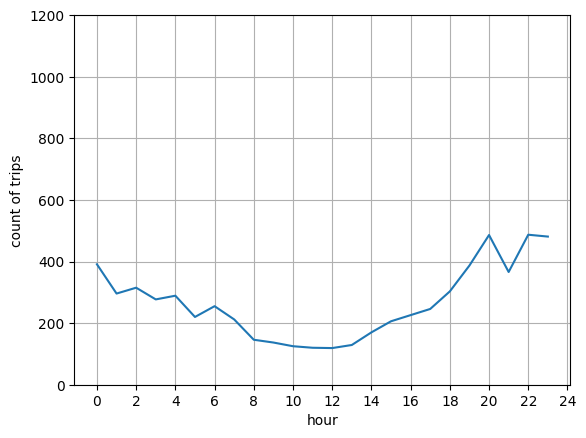

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df_hourly_trip,
             x=df_hourly_trip["trip_creation_hour"],
             y=df_hourly_trip["trip_uuid"])
plt.yticks(np.arange(0,1400,200))
plt.xticks(np.arange(0,26,2))
plt.xlabel("hour")
plt.ylabel("count of trips")
plt.grid("both")

## daily trips

In [85]:
df_daily_trip = df2.groupby(by="trip_creation_day")["trip_uuid"].count().to_frame().reset_index()
df_daily_trip.head()

,trip_creation_day,trip_uuid
0,1,277
1,2,221
2,3,261
3,12,312
4,13,324


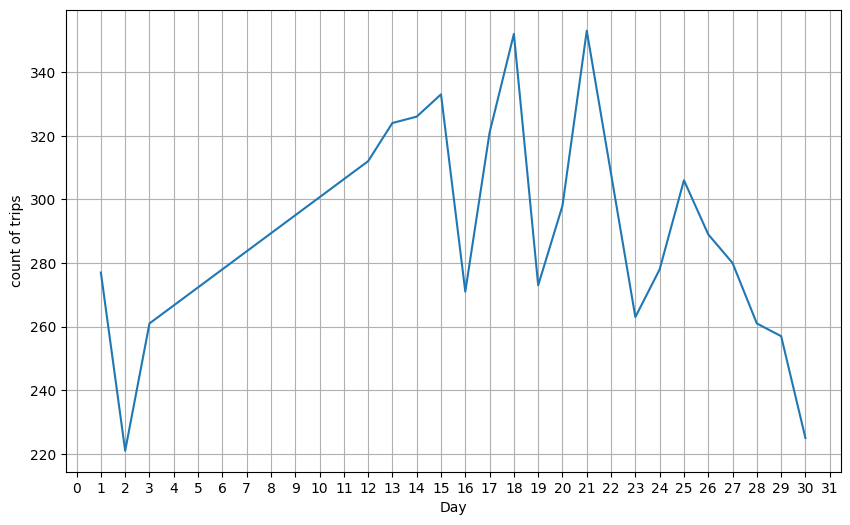

In [86]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_daily_trip,
             x=df_daily_trip["trip_creation_day"],
             y=df_daily_trip["trip_uuid"])
plt.xlabel("Day")
plt.xticks(np.arange(0,32))
plt.ylabel("count of trips")
plt.grid("both")

## Weekly trips

In [87]:
df_weekly_trip = df2.groupby(by="trip_creation_week")["trip_uuid"].count().to_frame().reset_index()
df_weekly_trip.head()

,trip_creation_week,trip_uuid
0,37,1566
1,38,2168
2,39,1896
3,40,759


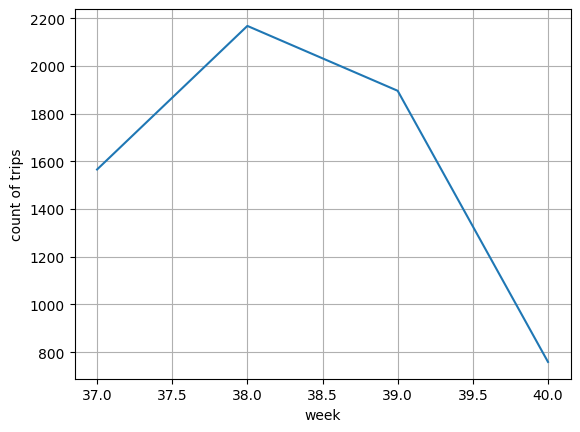

In [88]:
sns.lineplot(data=df_weekly_trip,
             x=df_weekly_trip["trip_creation_week"],
             y=df_weekly_trip["trip_uuid"])
plt.xlabel("week")
plt.ylabel("count of trips")
plt.grid("both")

## Monthly trips

In [89]:
df_monthly_trip = df2.groupby(by="trip_creation_month")["trip_uuid"].count().to_frame().reset_index()
df_monthly_trip["percentage"]=np.round(df_monthly_trip["trip_uuid"]*100/df_monthly_trip["trip_uuid"].sum(),2)
df_monthly_trip

,trip_creation_month,trip_uuid,percentage
0,9,5630,88.12
1,10,759,11.88


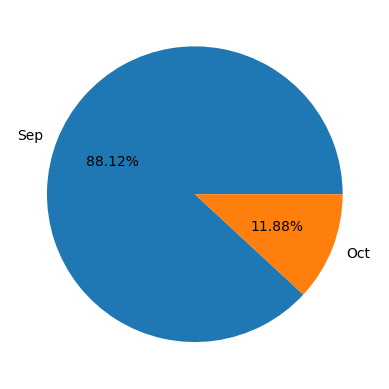

In [90]:
plt.pie(x=df_monthly_trip["percentage"],
        labels=["Sep","Oct"],
        autopct = '%.2f%%')
plt.show()

## Distribution of orders (Route wise)

*   List item
*   List item



In [91]:
df_routewise_trip=df2.groupby(by="route_type")["trip_uuid"].count().to_frame().reset_index()
df_routewise_trip["percentage"] = np.round(df_routewise_trip["trip_uuid"]*100/df_routewise_trip["trip_uuid"].sum(),2)
df_routewise_trip

<ipython-input-91-df7bcf8e7cf4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_routewise_trip=df2.groupby(by="route_type")["trip_uuid"].count().to_frame().reset_index()


,route_type,trip_uuid,percentage
0,Carting,3815,59.71
1,FTL,2574,40.29


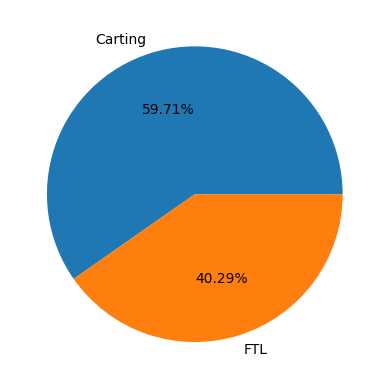

In [92]:
plt.pie(x=df_routewise_trip["percentage"],
        labels=["Carting","FTL"],
        autopct = "%.2f%%")
plt.show()

## Top 20 States with Maximum Trips

In [93]:
df_source_state = df2.groupby(by="state")["trip_uuid"].count().to_frame().reset_index()
df_source_state["percentage"] = np.round(df_source_state["trip_uuid"]*100/df_source_state["trip_uuid"].sum(),2)
df_source_state = df_source_state.sort_values(by="trip_uuid",ascending=False)[:20]
df_source_state.head()

,state,trip_uuid,percentage
17,Maharashtra,1191,18.64
14,Karnataka,896,14.02
10,Haryana,822,12.87
24,Tamil Nadu,412,6.45
7,Delhi,337,5.27


[]

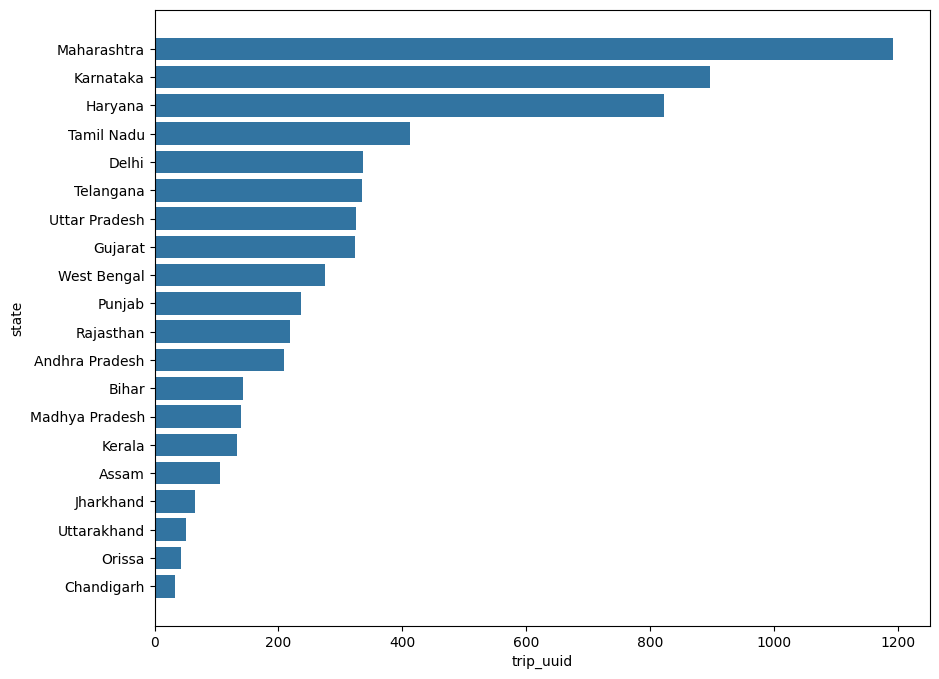

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(data = df_source_state,
            x = df_source_state["trip_uuid"],
            y = df_source_state["state"])
plt.plot()

## Top 20 cities with Maximum trips

In [95]:
df_source_city = df2.groupby(by="city")["trip_uuid"].count().to_frame().reset_index()
df_source_city["percentage"] = np.round(df_source_city["trip_uuid"]*100/df_source_city["trip_uuid"].sum(),2)
df_source_city = df_source_city.sort_values(by="trip_uuid",ascending=False)[:20]
df_source_city.head()

,city,trip_uuid,percentage
333,Mumbai,590,9.23
180,Gurgaon,513,8.03
136,Delhi,394,6.17
77,Bhiwandi,306,4.79
59,Bengaluru,285,4.46


[]

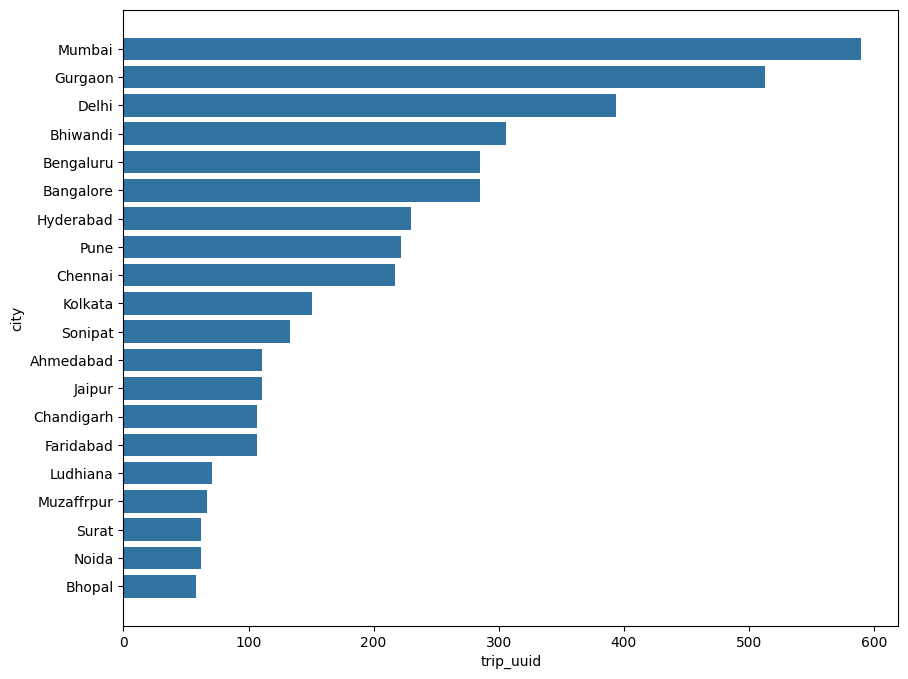

In [100]:
plt.figure(figsize=(10,8))
sns.barplot(data = df_source_city,
            x = df_source_city["trip_uuid"],
            y = df_source_city["city"])
plt.plot()

[]

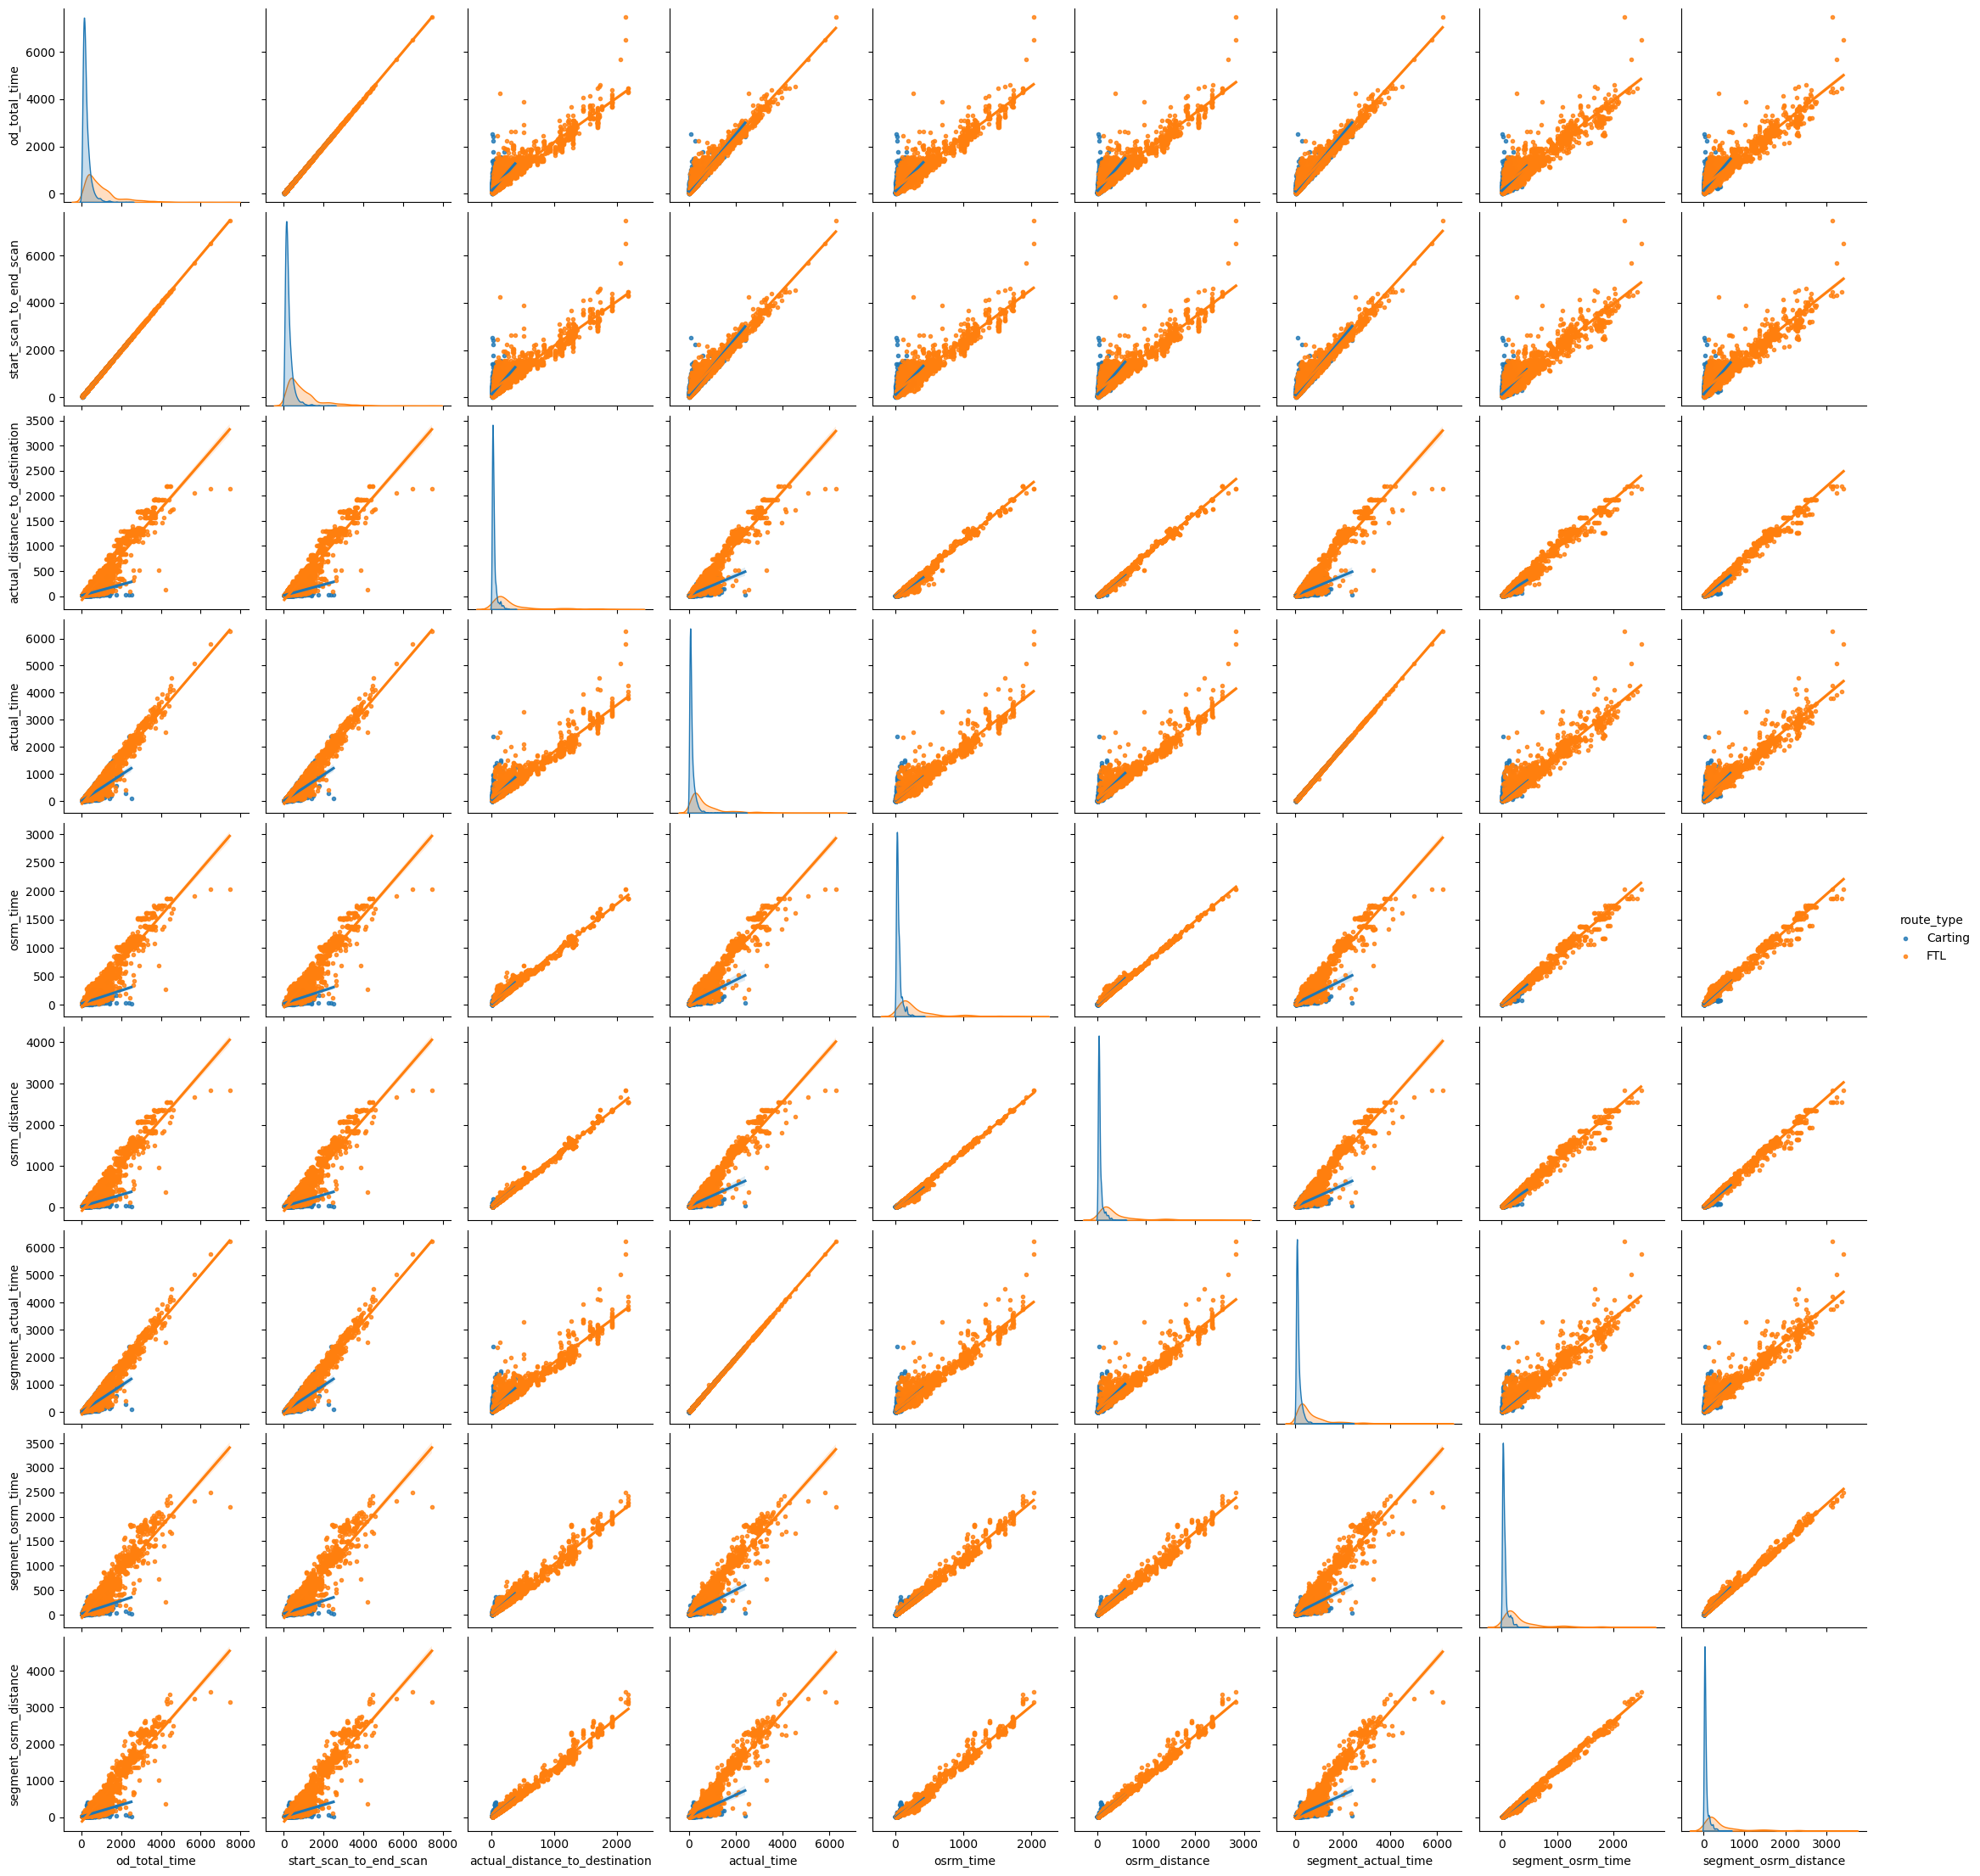

In [99]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = df2,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

In [98]:
df_corr = df2[numerical_columns].corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.925182,0.964499,0.933846,0.931036,0.964542,0.925320,0.926192
start_scan_to_end_scan,0.999999,1.000000,0.925267,0.964551,0.933901,0.931114,0.964593,0.925392,0.926284
actual_distance_to_destination,0.925182,0.925267,1.000000,0.956376,0.993817,0.997398,0.955456,0.987507,0.993387
actual_time,0.964499,0.964551,0.956376,1.000000,0.961027,0.961758,0.999986,0.955721,0.959476
osrm_time,0.933846,0.933901,0.993817,0.961027,1.000000,0.997603,0.960211,0.993140,0.991943
osrm_distance,0.931036,0.931114,0.997398,0.961758,0.997603,1.000000,0.960910,0.991693,0.994902
segment_actual_time,0.964542,0.964593,0.955456,0.999986,0.960211,0.960910,1.000000,0.954901,0.958631
segment_osrm_time,0.925320,0.925392,0.987507,0.955721,0.993140,0.991693,0.954901,1.000000,0.996039
segment_osrm_distance,0.926192,0.926284,0.993387,0.959476,0.991943,0.994902,0.958631,0.996039,1.000000


[]

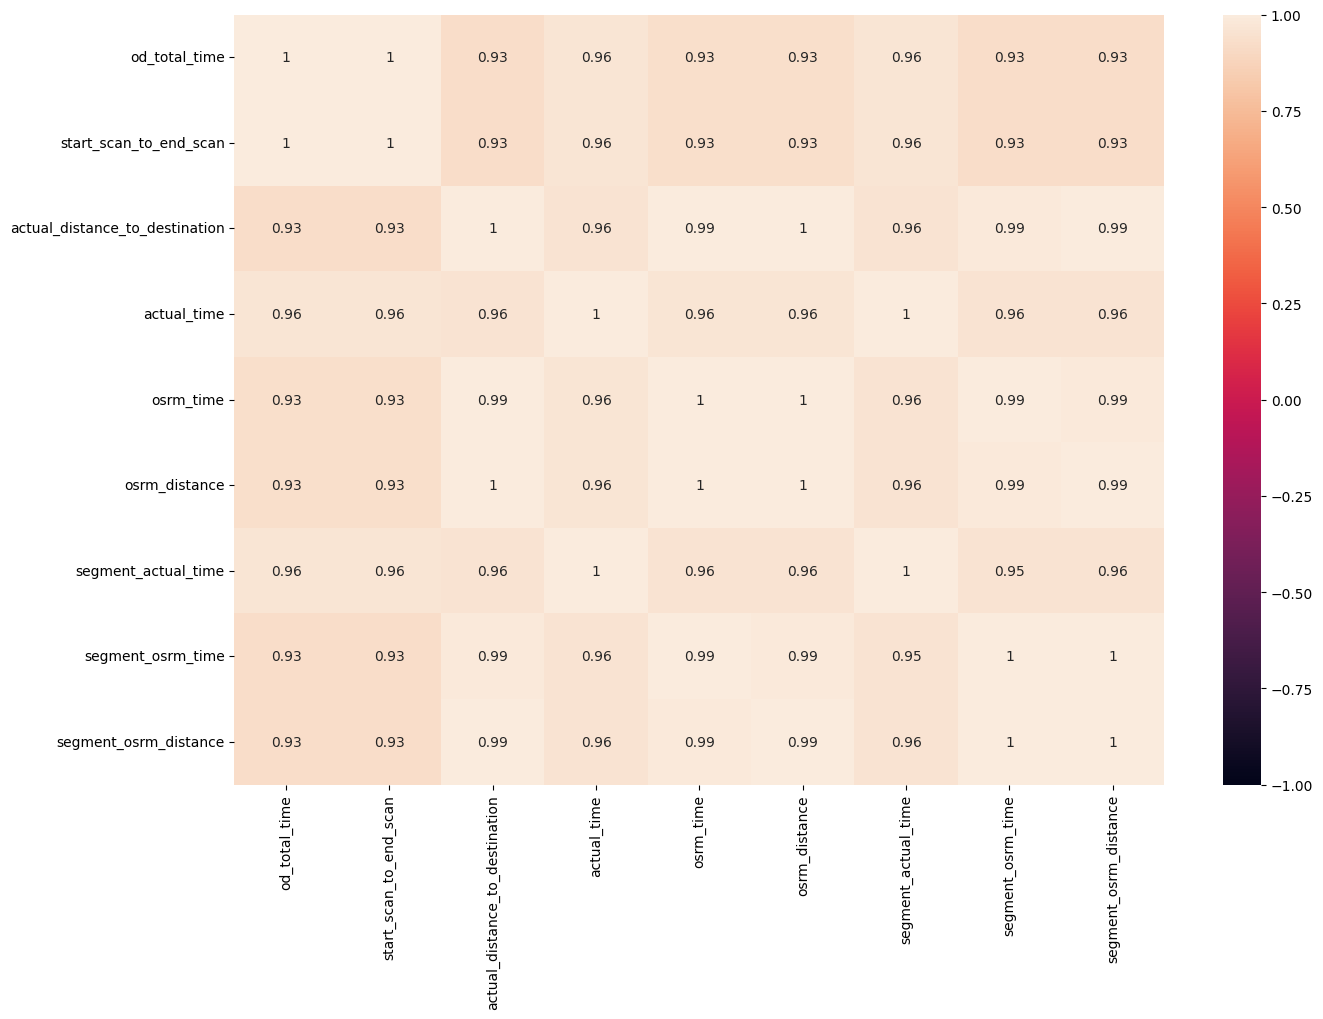

In [101]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

## 3.	In-depth analysis and feature engineering:

### Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [102]:
# Steps of Feature Engineering:

# Step 1: Set up Null & Alternate Hypothesis
# H0(Null Hypothesis): mean of od_total_time(Total trip time) and start_scan_to_end (Expected total trip time) are same.
# HA(Alternate Hypothesis): mean of od_total_time(Total trip time) and start_scan_to_end (Expected total trip time) are different.

# step 2: Basic assumptions for Hypothesis
# Distribution using QQ plot
# Homogenity of variances using lavene's test

# step 3: Define Test Statistics
# If the assumptions of T Test are met then we can proceed performing T Test for independent samples else
# we will perform the non parametric test equivalent to T Test for independent sample
# i.e., Mann-Whitney U rank test for two independent samples.

# step 4: compute the p-value and fix value of alpha
# alpha = 0.05

# step 5: Based on p-value we will reject or accept HO.
# p-val > alpha : Accept HO
# p-val < alpha : Reject HO

In [103]:
# checking mean, median and mode are equal
df2[["od_total_time","start_scan_to_end_scan"]].describe()

,od_total_time,start_scan_to_end_scan
count,6389.000000,6389.000000
mean,530.121471,529.236813
std,656.139089,655.977579
min,27.800000,27.000000
25%,150.530000,150.000000
50%,286.360000,285.000000
75%,630.900000,630.000000
max,7458.940000,7458.000000


# Histogram

# If it is following normal distribution, it will form a shape like bell.

[]

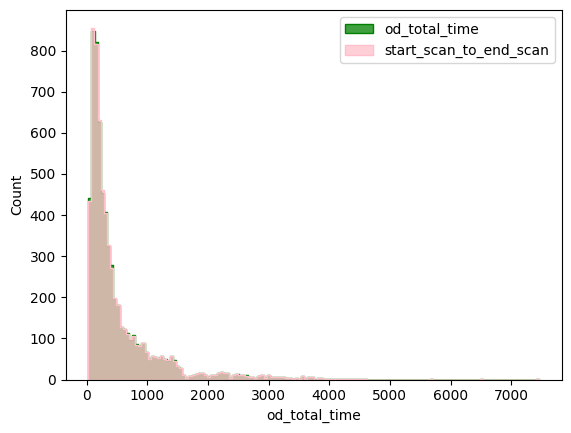

In [105]:
sns.histplot(df2['od_total_time'], element = 'step', color = 'green')
sns.histplot(df2['start_scan_to_end_scan'], element = 'step', color = 'pink')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

## Distribution check using QQ Plot

[]

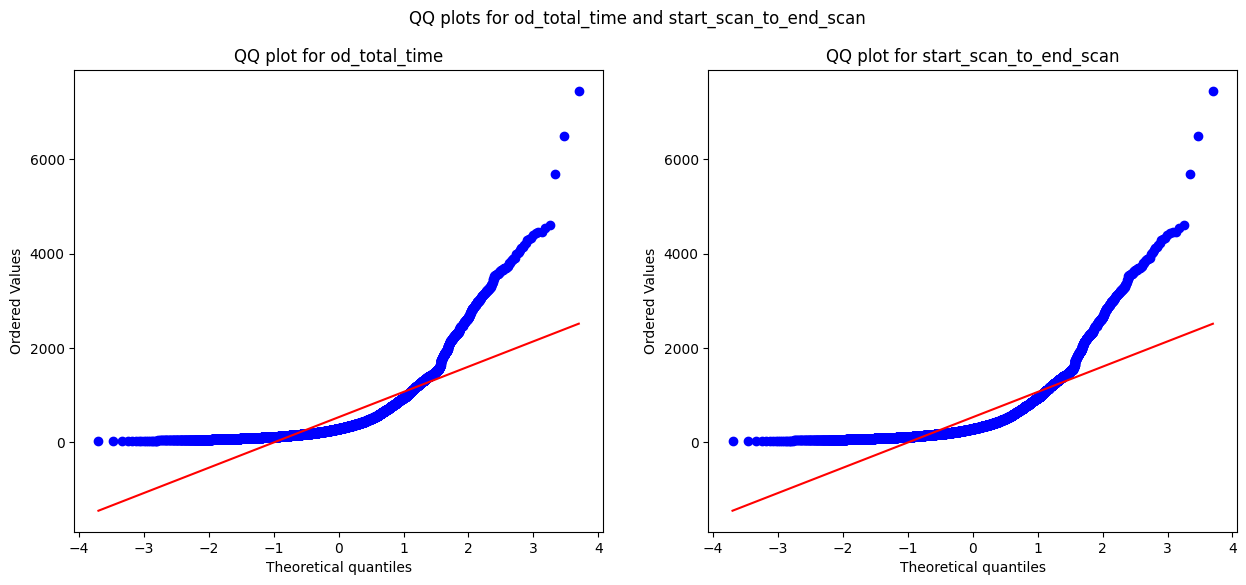

In [106]:
import scipy.stats as spy
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(df2['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

##### From the above both plots, we can infer that it will not follow normal distribution

$H_0$ : The sample follows normal distribution

$H_1$ : The sample does not follow normal distribution

alpha = 0.05


In [107]:
test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.5233924378256393e-71
The sample does not follow normal distribution


## Using box-cox transformation

In [108]:
transformed_start_scan_to_end_scan = spy.boxcox(df2['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.111506798849088e-16
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6389.
  res = hypotest_fun_out(*samples, **kwds)


## Homogenity of variances using lavene's test

In [109]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9786052888859295
The samples have Homogenous Variance 


### mean of time taken by od_total_time and start_scan_to_end_scan are same

# Hypothesis testing / visual analysis between actual_time and osrm_time

### Visual tests to know if the sample follows normal distribution

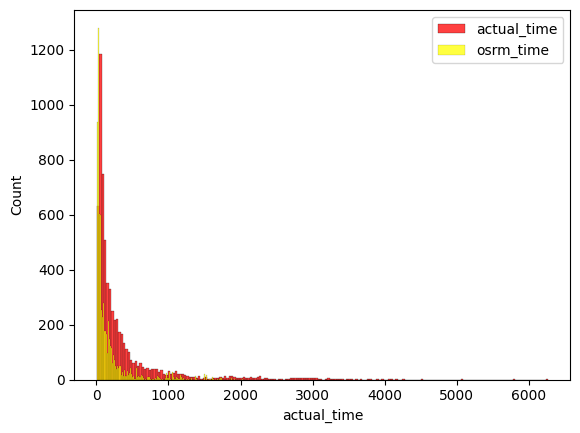

In [110]:
sns.histplot(df2["actual_time"], color="red")
sns.histplot(df2["osrm_time"], color="yellow")
plt.legend(["actual_time","osrm_time"])
plt.show()

## QQ Plot

[]

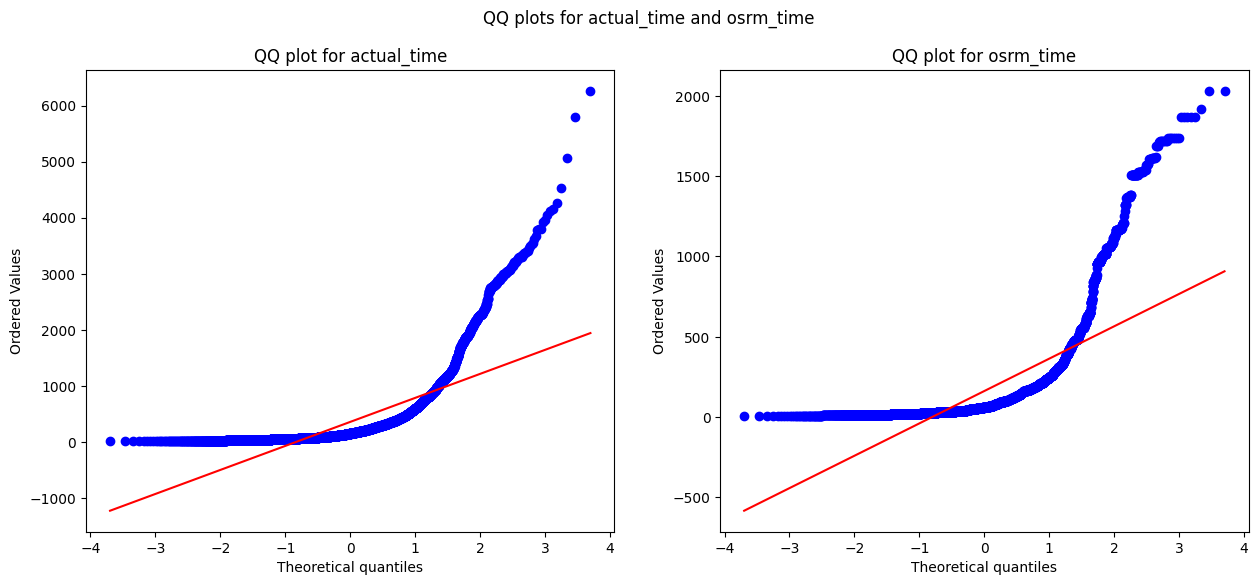

In [111]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

### It can be inferred that samples do not follow normal distribution

## Applying shapiro-wilk test for normality

In [112]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.0124634397295037e-76
The sample does not follow normal distribution


In [113]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.510329074044671e-78
The sample does not follow normal distribution


## boxcox Transformation

In [114]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1141597730172945e-18
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6389.
  res = hypotest_fun_out(*samples, **kwds)


In [115]:
transformed_osrm_time = spy.boxcox(df2['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.582293760561688e-24
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "actual_time" and "osrm_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [116]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 9.66831674607382e-96
The samples do not have  Homogenous Variance


##### Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [117]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('mean of actual_time and osrm_time are not similar')
else:
    print('mean of actual_time and osrm_time are similar ')

p-value 0.0
mean of actual_time and osrm_time are not similar


###  mean of actual_time and osrm_time are not similar

# Do Hypothesis testing between actual_time and segment_actual_time

## Histogram

[]

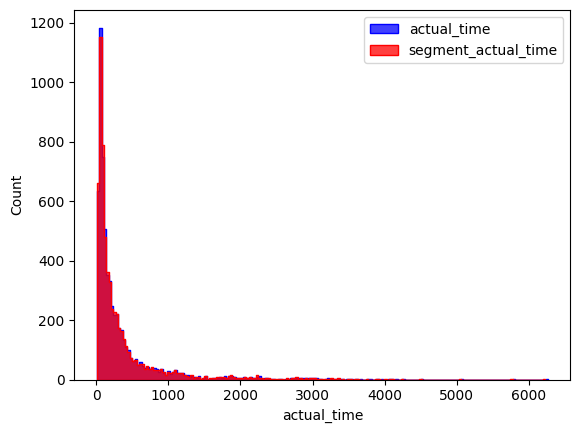

In [118]:
sns.histplot(df2['actual_time'], element = 'step', color = 'blue')
sns.histplot(df2['segment_actual_time'], element = 'step', color = 'red')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

* Distribution check using **QQ Plot**

[]

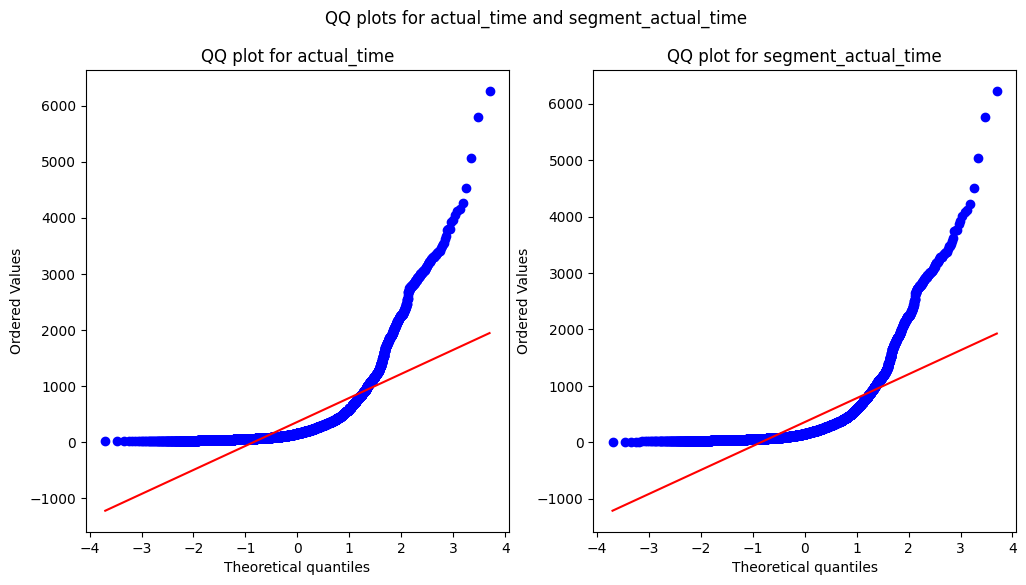

In [119]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

### Samples do not follow normal distribution.

 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**

$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

In [120]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.146199167561013e-76
The sample does not follow normal distribution


In [121]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.7062067117198442e-76
The sample does not follow normal distribution


In [122]:
transformed_actual_time = spy.boxcox(df2['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1141597730172945e-18
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6389.
  res = hypotest_fun_out(*samples, **kwds)


In [123]:
transformed_segment_actual_time = spy.boxcox(df2['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.859645865006125e-19
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.

Homogeneity of Variances using Lavene's test

In [124]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.796505679762837
The samples have Homogenous Variance 


##### Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [125]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('mean of actual_time and segment_actual_time are not similar')
else:
    print('mean of actual_time and segment_actual_time are similar ')

p-value 0.5916631806107828
mean of actual_time and segment_actual_time are similar 


## mean of actual_time and segment_actual_time are similar

#Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [126]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,6389.0,530.121471,656.139089,27.800000,150.530000,286.360000,630.900000,7458.940000
start_scan_to_end_scan,6389.0,529.236813,655.977579,27.000000,150.000000,285.000000,630.000000,7458.000000
actual_distance_to_destination,6389.0,165.726416,304.529308,9.003578,23.111736,48.798634,164.181821,2185.480257
actual_time,6389.0,357.829707,561.247586,9.000000,68.000000,151.000000,371.000000,6265.000000
osrm_time,6389.0,162.435905,271.000135,7.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,6389.0,205.815892,370.012229,9.072900,30.982200,66.364100,208.353700,2839.660300
segment_actual_time,6389.0,354.568790,556.138975,9.000000,67.000000,149.000000,368.000000,6230.000000
segment_osrm_time,6389.0,181.815308,312.489194,7.000000,31.000000,66.000000,185.000000,2494.000000
segment_osrm_distance,6389.0,224.398041,413.960244,9.072900,32.979500,71.626300,218.403200,3418.182900


In [127]:
import matplotlib as mpl
colors_list = list(mpl.colors.cnames)

In [128]:
clr = np.random.choice(colors_list)
clr

'mediumseagreen'

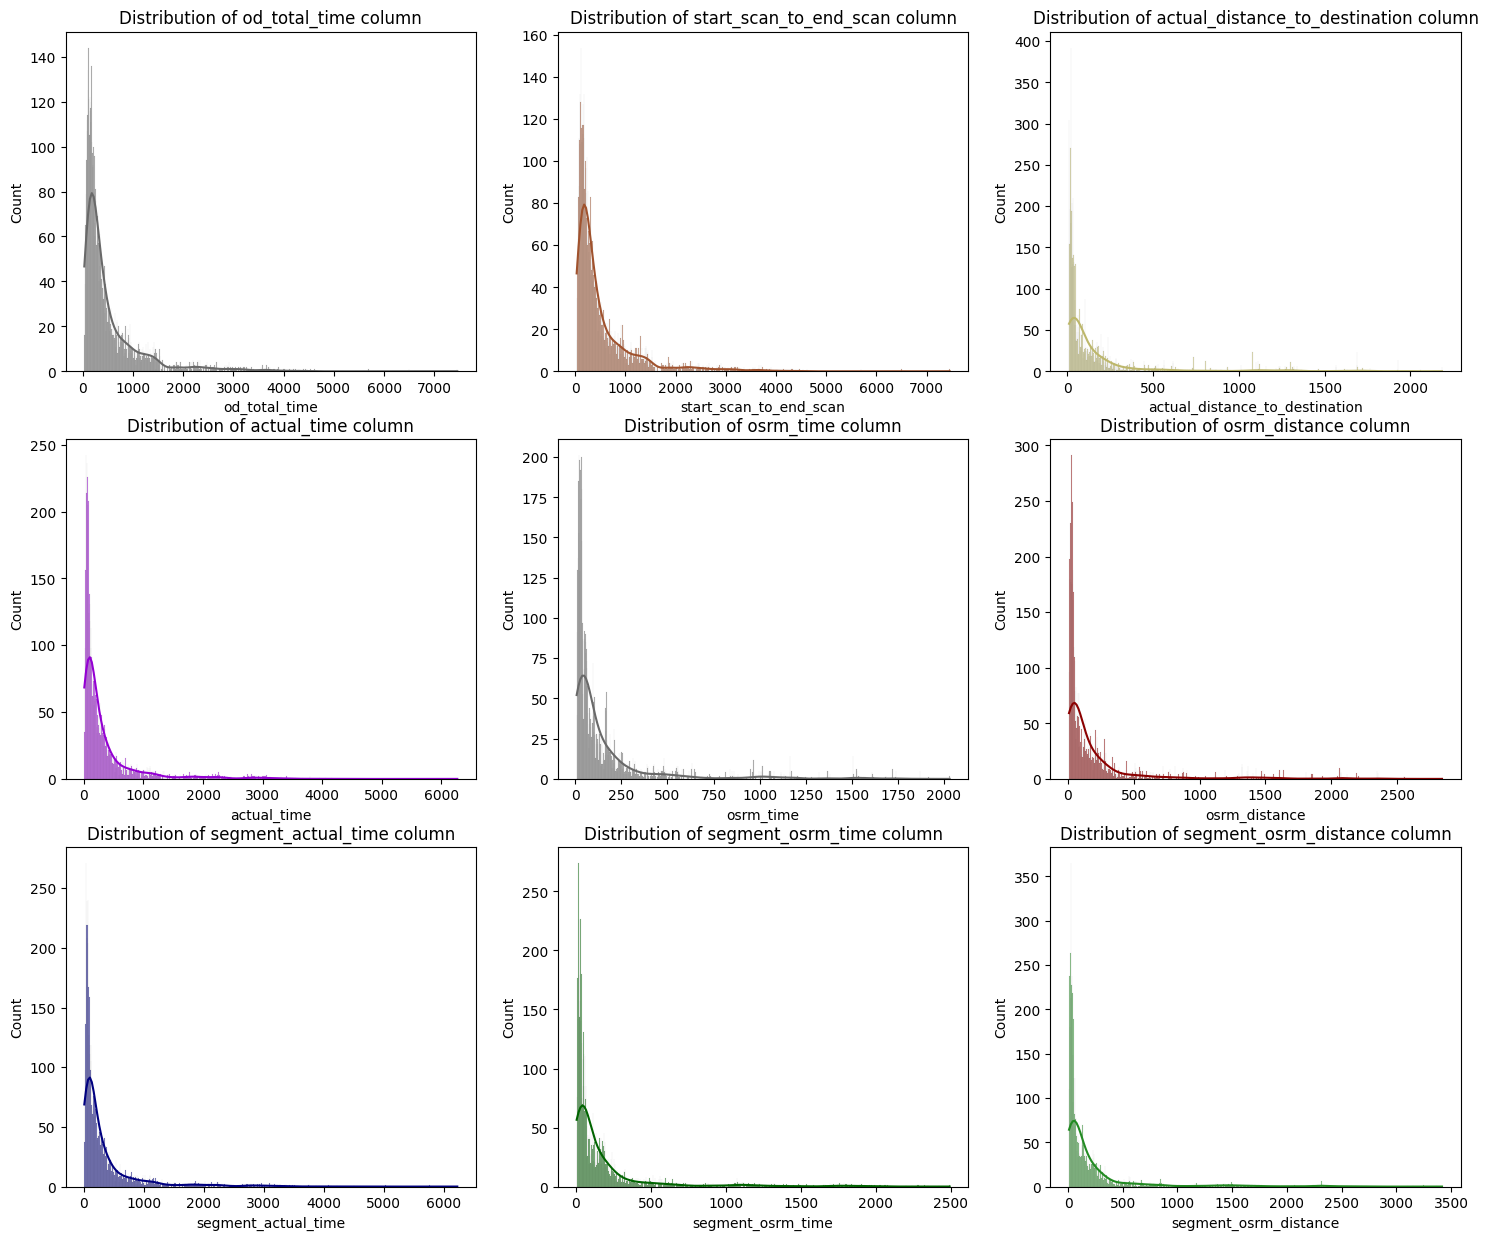

In [129]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.histplot(df2[numerical_columns[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

## As we can see from the above plots, all the histograms of numerical columns are right skewed, that means there are outliers present in the columns that needs to be cleaned.

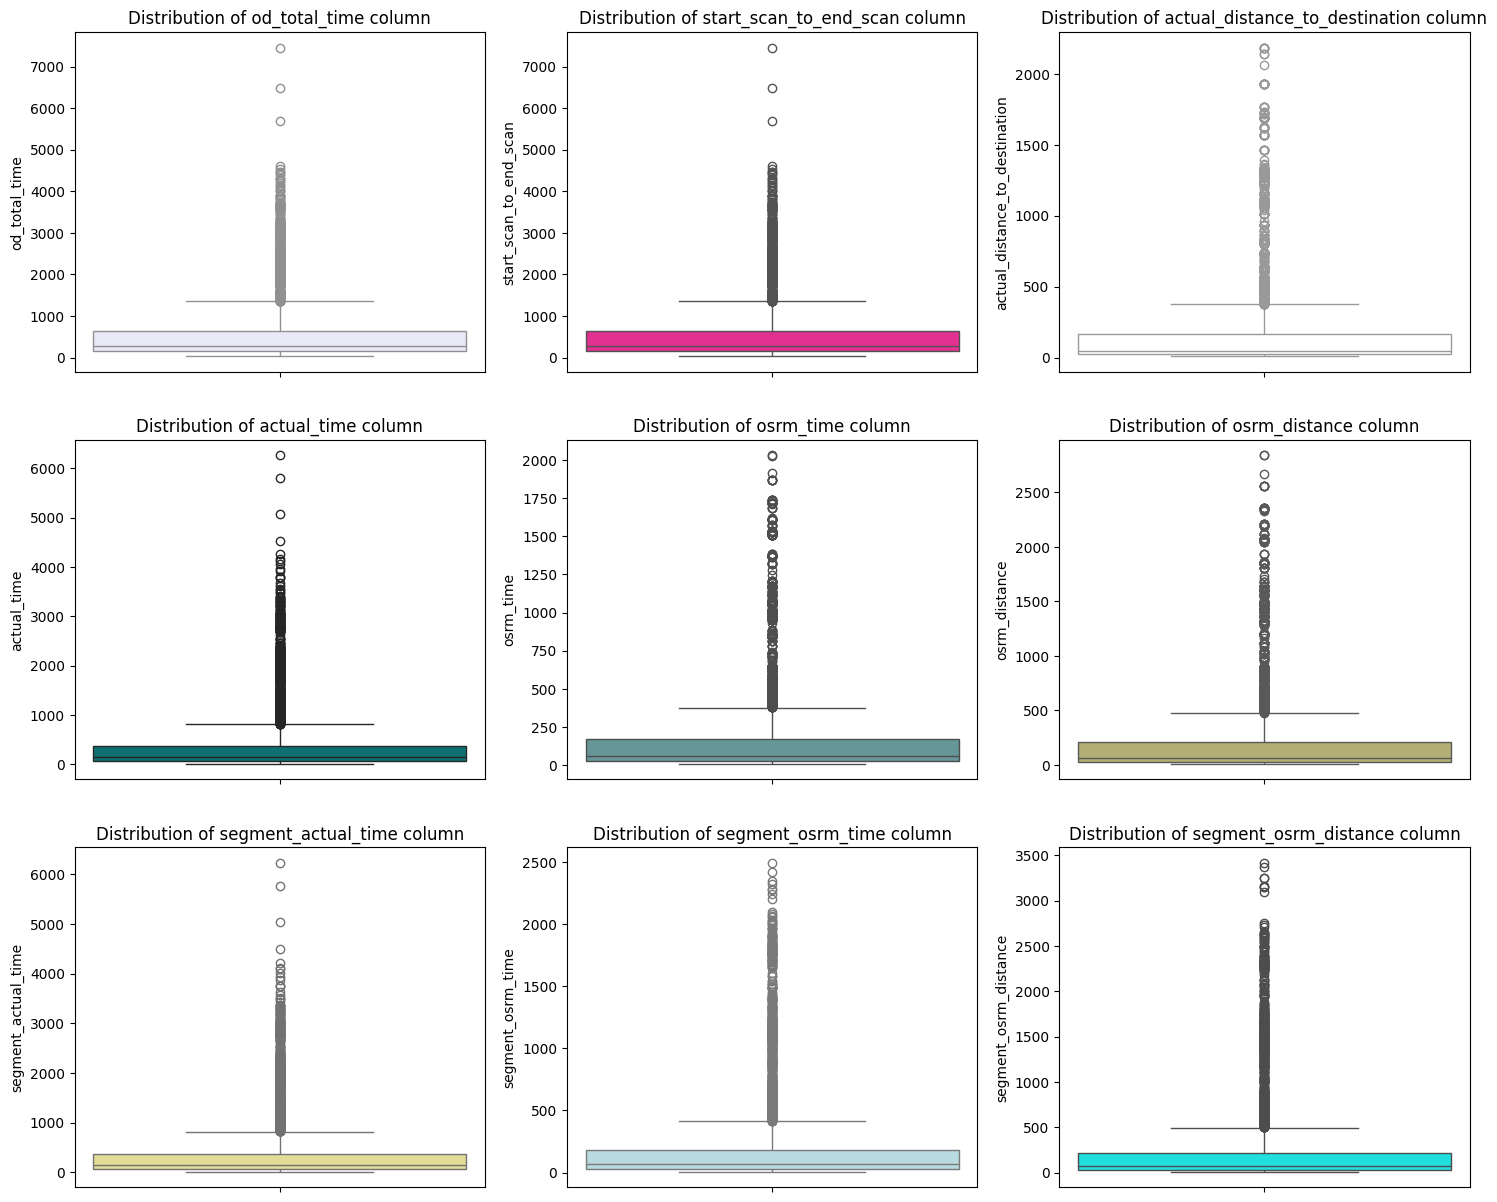

In [130]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df2[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

## It can be clearly seen in the above plots that there are outliers in all the numerical columns that can be treated.

In [131]:
# Detecting Outliers

for i in numerical_columns:
    Q1 = np.quantile(df2[i], 0.25)
    Q3 = np.quantile(df2[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : od_total_time
Q1 : 150.53
Q3 : 630.9
IQR : 480.37
LB : -570.0250000000001
UB : 1351.455
Number of outliers : 565
----------------------------------
Column : start_scan_to_end_scan
Q1 : 150.0
Q3 : 630.0
IQR : 480.0
LB : -570.0
UB : 1350.0
Number of outliers : 564
----------------------------------
Column : actual_distance_to_destination
Q1 : 23.111736038555037
Q3 : 164.18182098575048
IQR : 141.07008494719543
LB : -188.4933913822381
UB : 375.7869484065436
Number of outliers : 643
----------------------------------
Column : actual_time
Q1 : 68.0
Q3 : 371.0
IQR : 303.0
LB : -386.5
UB : 825.5
Number of outliers : 711
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 670
----------------------------------
Column : osrm_distance
Q1 : 30.9822
Q3 : 208.3537
IQR : 177.3715
LB : -235.07505
UB : 474.41095
Number of outliers : 671
----------------------------------
Column : segment_actual_time
Q1 : 67.0
Q3 : 3

##### One Hot encoding is not right suitable in route_type or data column, that is why we used label encoding. Label encoding also has some disadvatages like it expands our dataset, which is not needed.

### Label Encoding of categorical variables

In [132]:
# Get value counts before Label encoding

df2['route_type'].value_counts()

,count
route_type,
Carting,3815
FTL,2574


In [133]:
# Perform label encoding on categorical column route type

In [134]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

In [135]:
# Get value counts after Label encoding

df2['route_type'].value_counts()

,count
route_type,
0,3815
1,2574


In [136]:
# Get value counts of categorical variable 'data' before Label encoding

df2['data'].value_counts()

,count
data,
training,4607
test,1782


In [137]:
label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])

In [138]:
# Get value counts after label encoding

df2['data'].value_counts()

,count
data,
1,4607
0,1782


### 	Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [139]:
from sklearn.preprocessing import MinMaxScaler

[]

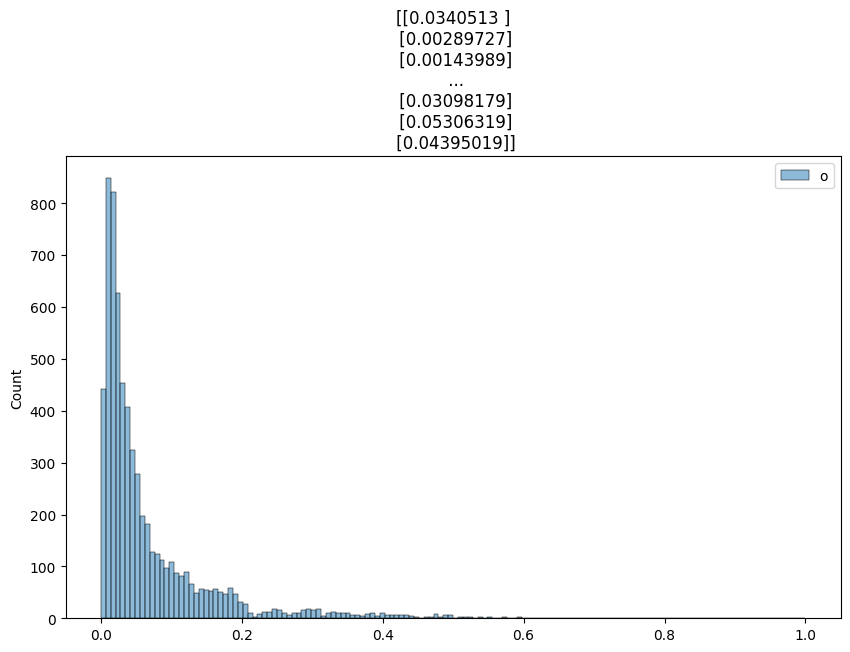

In [140]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{scaled}")
plt.legend('od_total_time')
plt.plot()

[]

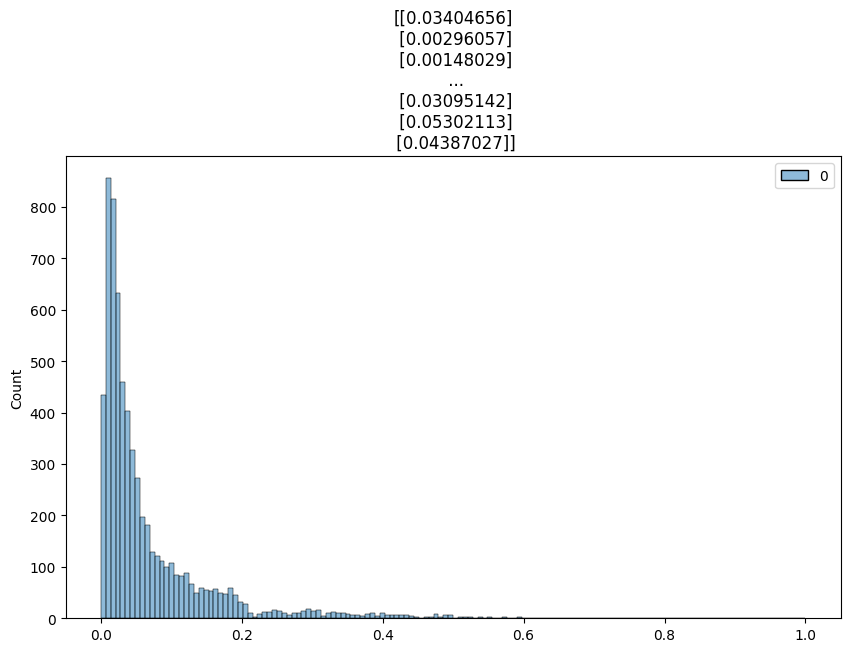

In [141]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{scaled}")
plt.plot()

[]

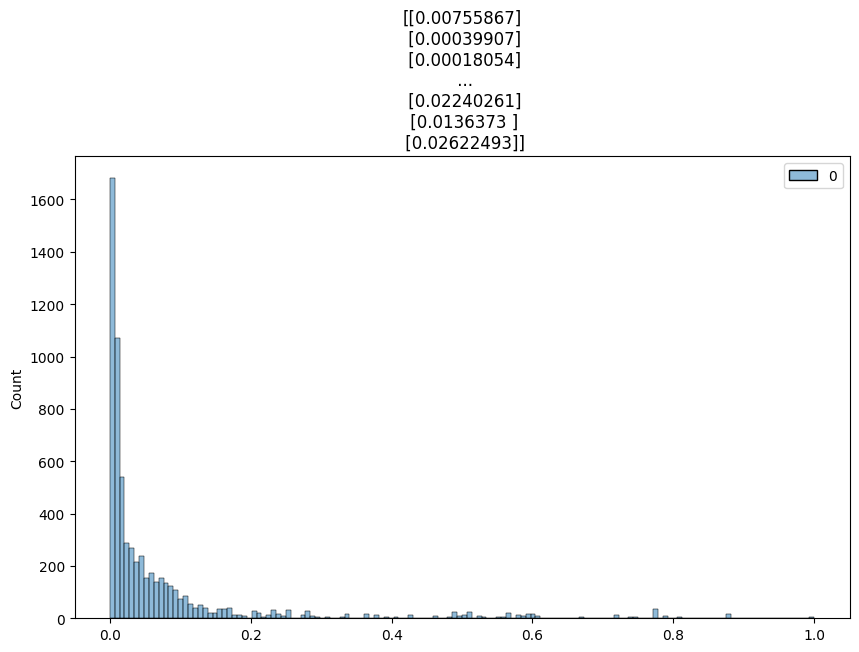

In [142]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{scaled}")
plt.plot()

[]

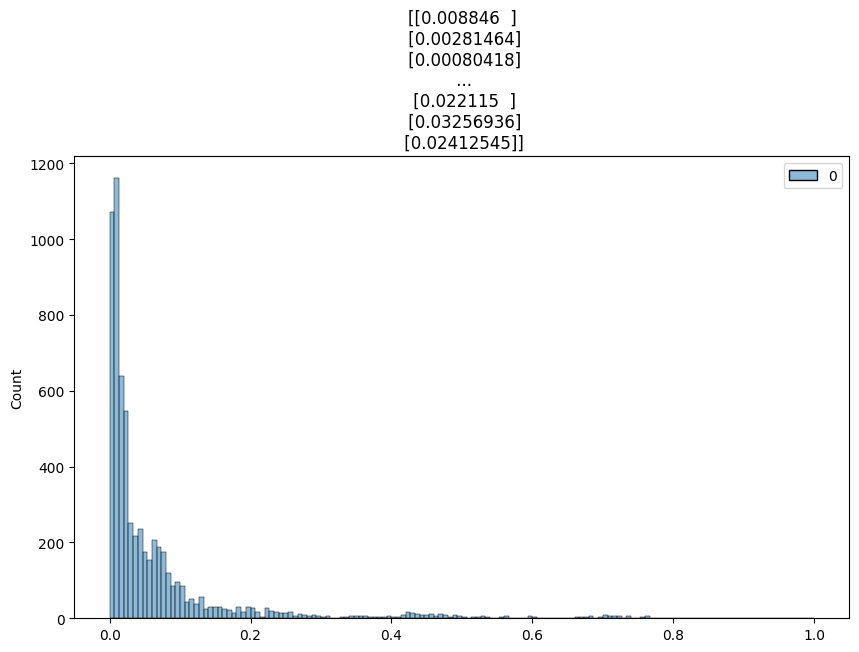

In [143]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{scaled}")
plt.plot()

[]

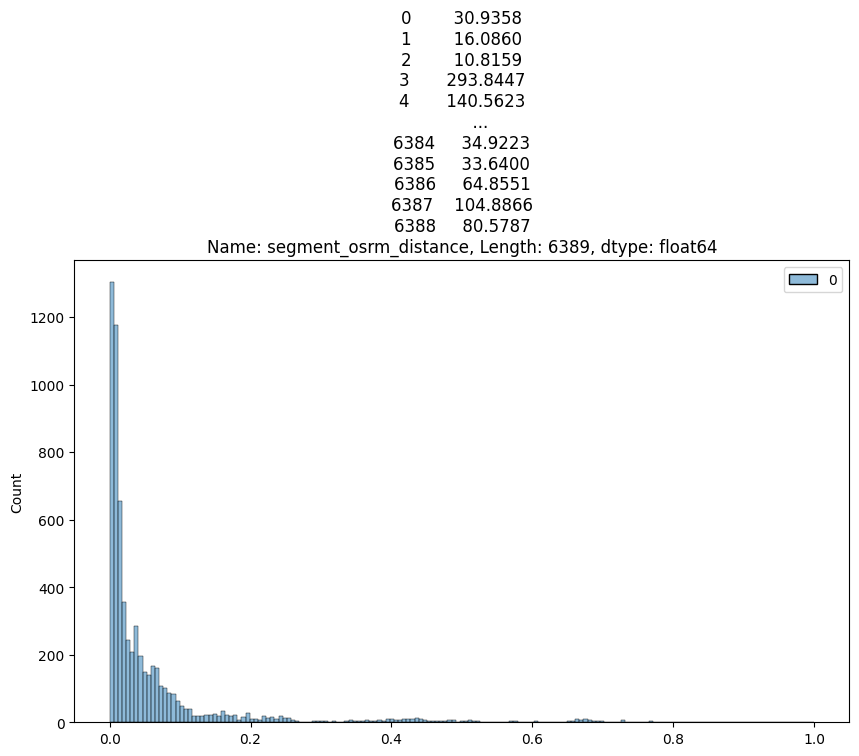

In [144]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{df2['segment_osrm_distance']}")
plt.plot()

# Standard Scaler

In [145]:
from sklearn.preprocessing import StandardScaler

[]

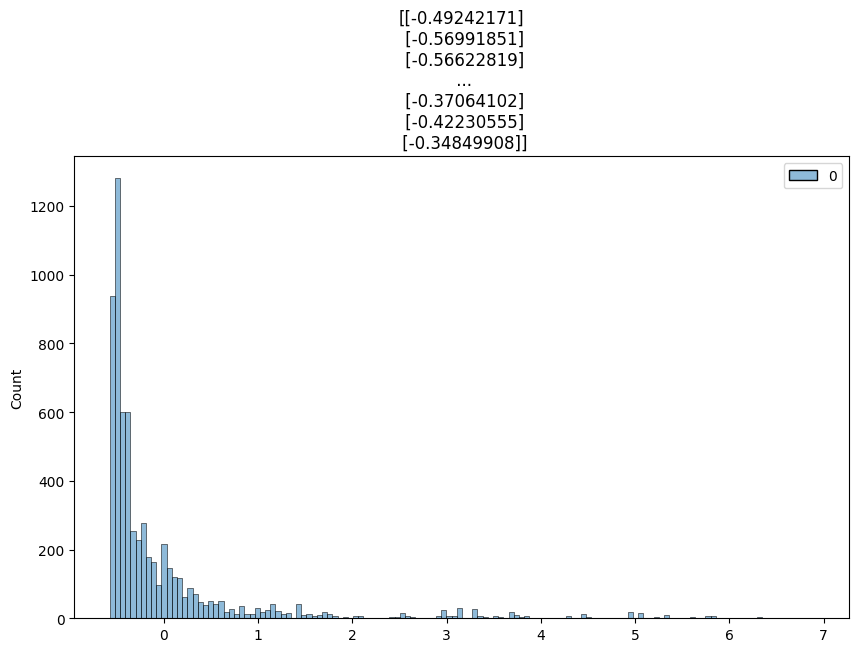

In [146]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{scaled}")
plt.plot()

[]

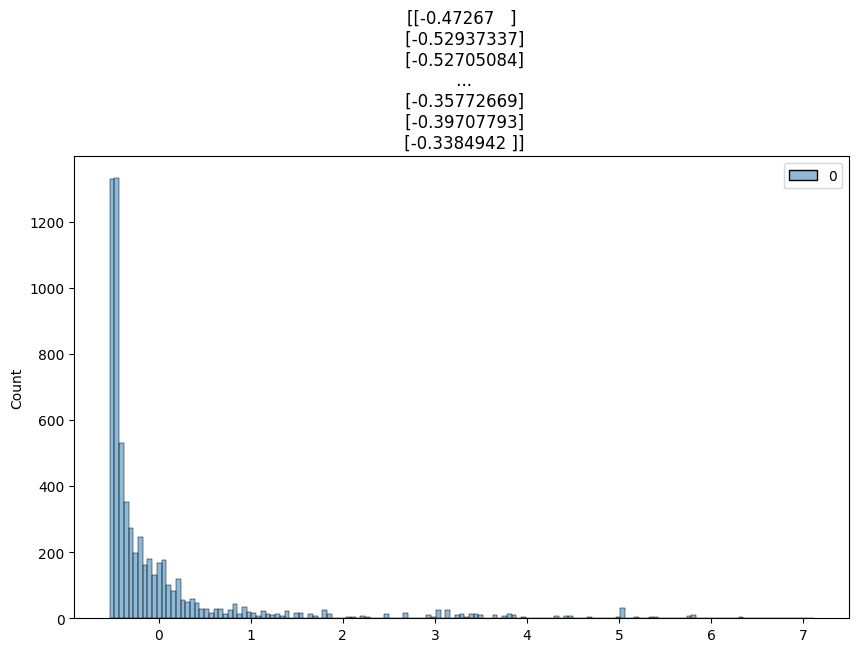

In [147]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"{scaled}")
plt.plot()

[]

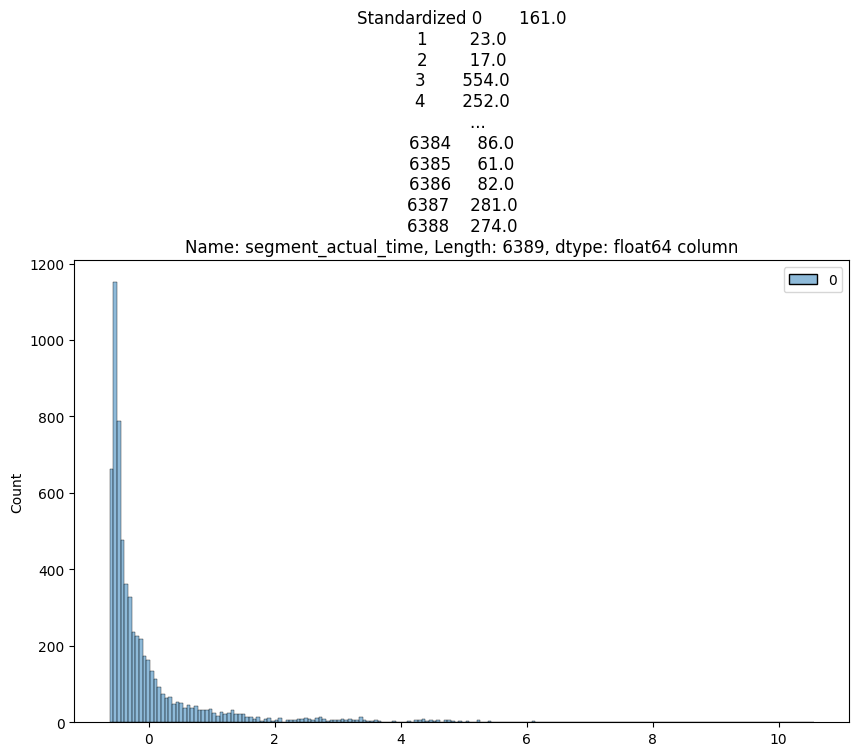

In [148]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.plot()

[]

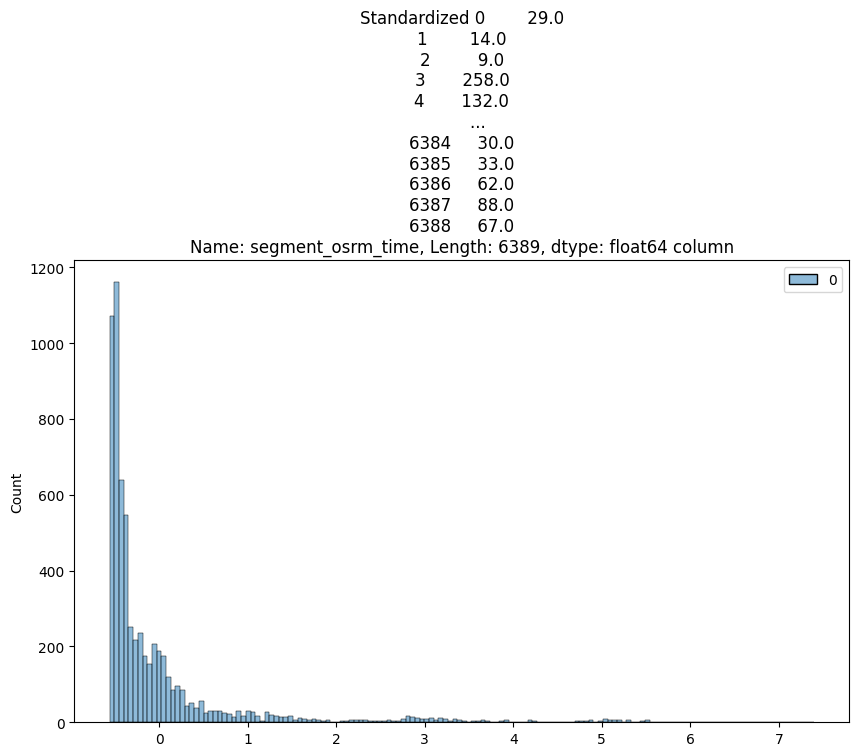

In [149]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.plot()

# Exoloratory Data Analysis: (Getting some insights from preprocessed Data)

## Busiest Route Analysis :
### Number of Trips between cities , sorted highest to lowest
### Top 10 source and destination cities which have high freqency of trips in between .

In [150]:
df2["source_city_state"] = df2["city"]+" "+df2["state"]
df2["destination_city_state"] = df2["destination_city"]+" "+df2["destination_state"]

In [151]:
Number_of_trips_between_cities = df2.groupby(["source_city_state","destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()[:10]

In [152]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"]!=Number_of_trips_between_cities["destination_city_state"]].reset_index(drop="True")

,source_city_state,destination_city_state,trip_uuid
0,Bhiwandi Maharashtra,Mumbai Maharashtra,186
1,Bangalore Karnataka,Bengaluru Karnataka,174
2,Mumbai Karnataka,Bengaluru Karnataka,129
3,Delhi Delhi,Gurgaon Haryana,125
4,Gurgaon Haryana,Delhi Delhi,119
5,Mumbai Maharashtra,Bhiwandi Maharashtra,117


In [153]:
df2.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'route_type', 'trip_creation_time', 'source_name', 'destination_name',
       'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'state', 'city', 'place', 'destination_state',
       'destination_city', 'destination_place', 'trip_creation_hour',
       'trip_creation_date', 'trip_creation_day', 'trip_creation_week',
       'trip_creation_month', 'trip_creation_year', 'source_city_state',
       'destination_city_state'],
      dtype='object')

In [154]:
df2["place"].nunique()

608

In [155]:
df2["destination_place"].nunique()

653

##BUSINESS INSIGHTS:-
1)Most trips use “Carting” (8K) transportation type as opposed to “FTL” (4K).

2)Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. Bhiwandi,Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. So, we see that the Southern, Western and Northern corridors have the top contributing cities.

3)The top contributor states (both source and destination) are : Maharashtra is the highest, followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West Bengal. Again we see Western, Southern and Northern corridors have significant contribution to the traffic.

4)The greatest amount of time was spent in intra-state trips within Maharashtra,Karnataka,Tamil Nadu, Telengana, UP.

5)The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra,Tamil Nadu, Telengana and Andhra.

6)Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai,Hyderabad. A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and Guragon to Delhi. These routes also contributed to the greatest amount of distance covered on trips.

7)OSRM seems to be calculating time taken as less than what time it actually takes. This might be because in actual scenario, there might be delays caused by unprecedented traffic or other delays.

8)OSRM seems to be calculating distance as less than what distance is actually covered. So,OSRM is underestimating time and overestimting the distance.

9)Route_type FTL in respect to distance and and time has greater mean as well as median yet FTL route type takes less time as well as distance for delivery.

10)Carting is prefered more in midnight orders.

##RECOMMENDATIONS:-

1)Since there is significant dfference between the time and distances calculated by OSRM with actual time and distances, it might make sense to revisit the information which is fed to the routing engine for trip planning.

2)We need to check for discrrepancies with transporters nd to check if the routing engine is configured for optimum performance.

3)We have seen that the Western, Southern and Northern corridors have significant traffic, however, not so much in Eastern, Central and North Eastern corridors. Increasing the presence in these corridors is worth investigating.

4)There is a need to plan resources (specifically during regional festivities) in the states/cities which have highest contribution to traffic.

5)Road network can be taken into consideration to increase the number of FTL deliveries inter state and to connect the states where there is lower traffic.

6)Since “carting” is more popular as method of transport, the number of hubs could be increased in cities and states which have highest contribution to traffic.

7)Carting is preferred more however, FTL performs well in all aspects of time and ditance. So, FTL should be executed more in order to do a faster yet on time deleveries.